In [1]:
import torch
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from qtaim_embed.models.utils import load_graph_level_model_from_config
from qtaim_embed.data.dataloader import DataLoaderMoleculeGraphTask
from qtaim_embed.core.dataset import HeteroGraphGraphLabelDataset


In [2]:
import pandas as pd

df = pd.read_pickle("../../../../data/splits_1205/train_libe_qtaim_1205_labelled.pkl")


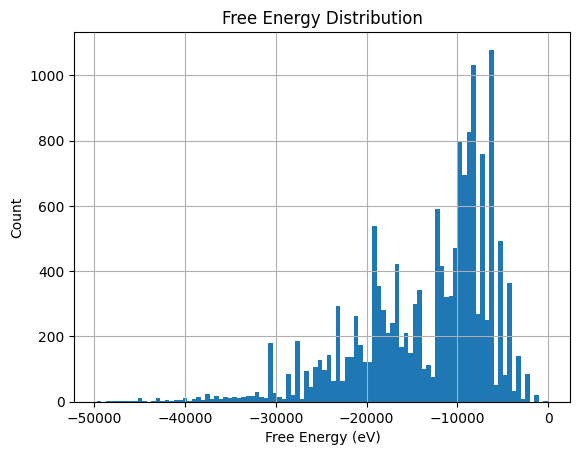

In [3]:
df["shifted_rrho_ev_free_energy"].hist(bins=100)
import matplotlib.pyplot as plt

plt.ylabel("Count")
plt.xlabel("Free Energy (eV)")
plt.title("Free Energy Distribution")
plt.savefig("free_energy.png")


In [4]:
# print mean, std, min, max
print(df["shifted_rrho_ev_free_energy"].describe())


count    15441.000000
mean    -13312.065876
std       7287.375701
min     -49726.179100
25%     -17980.461121
50%     -10624.740226
75%      -8286.478780
max        -31.934340
Name: shifted_rrho_ev_free_energy, dtype: float64


In [5]:
df_raw = pd.read_json("/home/santiagovargas/Downloads/libe.json")


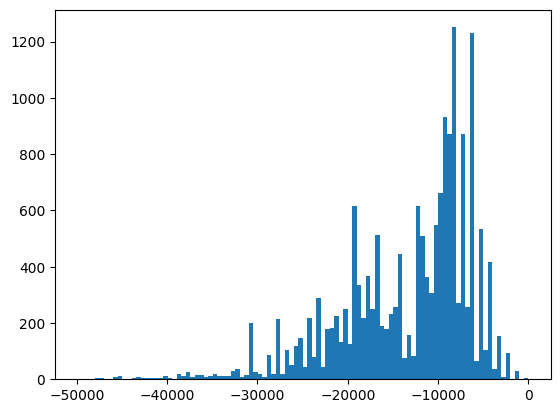

In [6]:
data = []
for ind, row in df_raw.iterrows():
    try:
        data.append(row.thermo["shifted_rrho_eV"]["free_energy"])
    except:
        pass

import matplotlib.pyplot as plt

plt.hist(data, bins=100)
plt.show()


In [7]:
model_root = "../../../../data/saved_models/1212/libe/"
models = os.listdir(model_root)
print(models)
print(len(models))


['model_lightning_epoch=514-val_loss=0.0002.ckpt', 'model_lightning_epoch=524-val_loss=0.0002.ckpt', 'model_lightning_epoch=033-val_loss=0.0106.ckpt', 'model_lightning_epoch=383-val_loss=0.0001.ckpt', 'model_lightning_epoch=323-val_loss=0.0001.ckpt', 'model_lightning_epoch=315-val_loss=0.0002.ckpt', 'model_lightning_epoch=070-val_loss=0.0133.ckpt', 'model_lightning_epoch=528-val_loss=0.0001.ckpt', 'model_lightning_epoch=355-val_loss=0.0002.ckpt', 'model_lightning_epoch=241-val_loss=0.0002.ckpt', 'model_lightning_epoch=326-val_loss=0.0001.ckpt', 'model_lightning_epoch=831-val_loss=0.0002.ckpt', 'model_lightning_epoch=400-val_loss=0.0002.ckpt', 'model_lightning_epoch=378-val_loss=0.0002.ckpt', 'model_lightning_epoch=073-val_loss=0.0190.ckpt', 'model_lightning_epoch=278-val_loss=0.0002.ckpt', 'model_lightning_epoch=481-val_loss=0.0001.ckpt', 'model_lightning_epoch=035-val_loss=0.0168.ckpt', 'model_lightning_epoch=408-val_loss=0.0002.ckpt', 'model_lightning_epoch=430-val_loss=0.0002.ckpt',

In [8]:
qtaim_keys = {
    "atom": ["extra_feat_atom_esp_total"],
    "bond": ["extra_feat_bond_esp_total", "extra_feat_bond_eta"],
    "global": ["shifted_rrho_ev_free_energy", "charge", "spin"],
}

qtaim_keys_mid = {
    "atom": [
        "extra_feat_atom_Lagrangian_K",
        "extra_feat_atom_Hamiltonian_K",
        "extra_feat_atom_e_density",
        "extra_feat_atom_lap_e_density",
        "extra_feat_atom_esp_total",
        "extra_feat_atom_det_hessian",
        "extra_feat_atom_eta",
    ],
    "bond": [
        "extra_feat_bond_Lagrangian_K",
        "extra_feat_bond_Hamiltonian_K",
        "extra_feat_bond_e_density",
        "extra_feat_bond_lap_e_density",
        "extra_feat_bond_e_loc_func",
        "extra_feat_bond_esp_e",
        "extra_feat_bond_esp_total",
        "extra_feat_bond_grad_norm",
        "extra_feat_bond_lap_norm",
        "extra_feat_bond_ellip_e_dens",
        "extra_feat_bond_eta",
    ],
    "global": ["shifted_rrho_ev_free_energy", "charge", "spin"],
}

qtaim_keys_high = {
    "atom": [
        "extra_feat_atom_Lagrangian_K",
        "extra_feat_atom_Hamiltonian_K",
        "extra_feat_atom_e_density",
        "extra_feat_atom_lap_e_density",
        "extra_feat_atom_e_loc_func",
        "extra_feat_atom_ave_loc_ion_E",
        "extra_feat_atom_delta_g_promolecular",
        "extra_feat_atom_delta_g_hirsh",
        "extra_feat_atom_esp_nuc",
        "extra_feat_atom_esp_e",
        "extra_feat_atom_esp_total",
        "extra_feat_atom_grad_norm",
        "extra_feat_atom_lap_norm",
        "extra_feat_atom_eig_hess",
        "extra_feat_atom_det_hessian",
        "extra_feat_atom_ellip_e_dens",
        "extra_feat_atom_eta",
        "extra_feat_atom_density_beta",
        "extra_feat_atom_density_alpha",
        "extra_feat_atom_spin_density",
        "extra_feat_atom_lol",
    ],
    "bond": [
        "extra_feat_bond_Lagrangian_K",
        "extra_feat_bond_Hamiltonian_K",
        "extra_feat_bond_e_density",
        "extra_feat_bond_lap_e_density",
        "extra_feat_bond_e_loc_func",
        "extra_feat_bond_ave_loc_ion_E",
        "extra_feat_bond_delta_g_promolecular",
        "extra_feat_bond_delta_g_hirsh",
        "extra_feat_bond_esp_nuc",
        "extra_feat_bond_esp_e",
        "extra_feat_bond_esp_total",
        "extra_feat_bond_grad_norm",
        "extra_feat_bond_lap_norm",
        "extra_feat_bond_eig_hess",
        "extra_feat_bond_det_hessian",
        "extra_feat_bond_ellip_e_dens",
        "extra_feat_bond_eta",
        "extra_feat_bond_energy_density",
        "extra_feat_bond_density_beta",
        "extra_feat_bond_density_alpha",
        "extra_feat_bond_spin_density",
        "extra_feat_bond_lol",
    ],
    "global": ["shifted_rrho_ev_free_energy", "charge", "spin"],
}

base_dict = {
    "atom": [],
    "bond": [],
    "global": ["shifted_rrho_ev_free_energy", "charge", "spin"],
}

libe_loc = "../../../../data/splits_1205/test_libe_qtaim_1205_labelled.pkl"
libe_loc_train = "../../../../data/splits_1205/train_libe_qtaim_1205_labelled.pkl"
keys_list = [
    base_dict,
    qtaim_keys,
    qtaim_keys_mid,
    qtaim_keys_high,
]
dataset_dict = {}

for ind, feat_dict in enumerate(keys_list):
    if ind == 0:
        key = "base"
    elif ind == 1:
        key = "qtaim"
    elif ind == 2:
        key = "qtaim_mid"
    elif ind == 3:
        key = "qtaim_full"

    dataset_dict[key + "_test"] = HeteroGraphGraphLabelDataset(
        file=libe_loc,
        allowed_ring_size=[3, 4, 5, 6, 7],
        allowed_charges=[-1, 0, 1],
        allowed_spins=[1, 2, 3],
        self_loop=True,
        extra_keys=feat_dict,
        target_list=["shifted_rrho_ev_free_energy"],
        extra_dataset_info={},
        debug=False,
        log_scale_features=True,
        log_scale_targets=False,
        standard_scale_features=True,
        standard_scale_targets=True,
    )
    dataset_dict[key + "_train"] = HeteroGraphGraphLabelDataset(
        file=libe_loc_train,
        allowed_ring_size=[3, 4, 5, 6, 7],
        allowed_charges=[-1, 0, 1],
        allowed_spins=[1, 2, 3],
        self_loop=True,
        extra_keys=feat_dict,
        target_list=["shifted_rrho_ev_free_energy"],
        extra_dataset_info={},
        debug=False,
        log_scale_features=True,
        log_scale_targets=False,
        standard_scale_features=True,
        standard_scale_targets=True,
    )


... > creating MoleculeWrapper objects


100%|██████████| 1716/1716 [00:00<00:00, 18604.44it/s]


... > bond_feats_error_count:  0
... > atom_feats_error_count:  0
element set {'P', 'Li', 'S', 'C', 'H', 'O', 'F', 'N'}
selected atomic keys []
selected bond keys []
selected global keys ['shifted_rrho_ev_free_energy', 'charge', 'spin']
... > Building graphs and featurizing


100%|██████████| 1716/1716 [00:02<00:00, 637.71it/s]


included in labels
{'global': ['shifted_rrho_ev_free_energy']}
included in graph features
{'atom': ['total_degree', 'total_H', 'is_in_ring', 'ring_size_3', 'ring_size_4', 'ring_size_5', 'ring_size_6', 'ring_size_7', 'chemical_symbol_P', 'chemical_symbol_Li', 'chemical_symbol_S', 'chemical_symbol_C', 'chemical_symbol_H', 'chemical_symbol_O', 'chemical_symbol_F', 'chemical_symbol_N'], 'bond': ['metal bond', 'ring inclusion', 'ring size_3', 'ring size_4', 'ring size_5', 'ring size_6', 'ring size_7'], 'global': ['num atoms', 'num bonds', 'molecule weight', 'charge one hot', 'charge one hot', 'charge one hot', 'spin one hot', 'spin one hot', 'spin one hot']}
original loader node types: dict_keys(['atom', 'bond', 'global'])
original loader label types: dict_keys([])
include names:  dict_keys(['global'])
... > parsing labels and features in graphs


100%|██████████| 1716/1716 [00:00<00:00, 31989.27it/s]


original loader node types: dict_keys(['atom', 'bond', 'global'])
original loader label types: dict_keys(['global'])
... > Log scaling features
... > Log scaling features complete
... > Scaling features
mean [0.82051049 0.12242161 0.07909777 0.00656382 0.05048244 0.01205826
 0.00859197 0.00140127 0.01191076 0.0463524  0.00413005 0.20550669
 0.21188614 0.16778314 0.04406612 0.00151189]
std [0.5301781  0.31105153 0.22038588 0.06713131 0.1801202  0.09062421
 0.07669211 0.0311339  0.09007798 0.17314875 0.05334485 0.31656498
 0.3193314  0.29689599 0.16912269 0.03233694]
mean [0.         0.09420027 0.00786088 0.05984692 0.01498344 0.01068385
 0.00182407]
std [0.         0.23753096 0.07339587 0.19468197 0.10080292 0.08538931
 0.03551088]
Standard deviation for feature 0 is 0.0, smaller than 0.001. You may want to exclude this feature.
mean [2.41164055 2.24761734 4.63867565 0.24397488 0.24478275 0.20438955
 0.29971749 0.29244671 0.10098298]
std [0.37903647 0.42249919 0.41820949 0.33103891 0.33

100%|██████████| 15441/15441 [00:00<00:00, 20435.95it/s]


... > bond_feats_error_count:  0
... > atom_feats_error_count:  0
element set {'P', 'Li', 'S', 'C', 'H', 'O', 'F', 'N'}
selected atomic keys []
selected bond keys []
selected global keys ['shifted_rrho_ev_free_energy', 'charge', 'spin']
... > Building graphs and featurizing


100%|██████████| 15441/15441 [00:23<00:00, 670.67it/s]


included in labels
{'global': ['shifted_rrho_ev_free_energy']}
included in graph features
{'atom': ['total_degree', 'total_H', 'is_in_ring', 'ring_size_3', 'ring_size_4', 'ring_size_5', 'ring_size_6', 'ring_size_7', 'chemical_symbol_P', 'chemical_symbol_Li', 'chemical_symbol_S', 'chemical_symbol_C', 'chemical_symbol_H', 'chemical_symbol_O', 'chemical_symbol_F', 'chemical_symbol_N'], 'bond': ['metal bond', 'ring inclusion', 'ring size_3', 'ring size_4', 'ring size_5', 'ring size_6', 'ring size_7'], 'global': ['num atoms', 'num bonds', 'molecule weight', 'charge one hot', 'charge one hot', 'charge one hot', 'spin one hot', 'spin one hot', 'spin one hot']}
original loader node types: dict_keys(['atom', 'bond', 'global'])
original loader label types: dict_keys([])
include names:  dict_keys(['global'])
... > parsing labels and features in graphs


100%|██████████| 15441/15441 [00:00<00:00, 30870.81it/s]


original loader node types: dict_keys(['atom', 'bond', 'global'])
original loader label types: dict_keys(['global'])
... > Log scaling features
... > Log scaling features complete
... > Scaling features
mean [0.81882055 0.12294483 0.07864681 0.00636963 0.04923264 0.012599
 0.00870874 0.0017368  0.01177804 0.04642736 0.00448019 0.20448417
 0.21217394 0.16919955 0.04265673 0.00194719]
std [0.52936523 0.31073827 0.21983742 0.06614016 0.17804946 0.09259712
 0.0772049  0.03465313 0.08958346 0.17327866 0.05554604 0.31610734
 0.31945264 0.29774436 0.1665767  0.03668651]
mean [0.         0.09396846 0.0077247  0.0588101  0.01550789 0.01058552
 0.00231985]
std [0.         0.23728444 0.07276459 0.19314612 0.10251223 0.08500161
 0.04003267]
Standard deviation for feature 0 is 0.0, smaller than 0.001. You may want to exclude this feature.
mean [2.40803768 2.24163705 4.63554331 0.25286562 0.23580741 0.20447415
 0.28689228 0.30848439 0.09777052]
std [0.37162319 0.41515977 0.40878447 0.33366461 0.3283

100%|██████████| 1716/1716 [00:00<00:00, 10384.38it/s]


... > bond_feats_error_count:  0
... > atom_feats_error_count:  0
element set {'P', 'Li', 'S', 'C', 'H', 'O', 'F', 'N'}
selected atomic keys ['extra_feat_atom_esp_total']
selected bond keys ['extra_feat_bond_esp_total', 'extra_feat_bond_eta']
selected global keys ['shifted_rrho_ev_free_energy', 'charge', 'spin']
... > Building graphs and featurizing


100%|██████████| 1716/1716 [00:02<00:00, 656.32it/s]


included in labels
{'global': ['shifted_rrho_ev_free_energy']}
included in graph features
{'atom': ['total_degree', 'total_H', 'is_in_ring', 'ring_size_3', 'ring_size_4', 'ring_size_5', 'ring_size_6', 'ring_size_7', 'chemical_symbol_P', 'chemical_symbol_Li', 'chemical_symbol_S', 'chemical_symbol_C', 'chemical_symbol_H', 'chemical_symbol_O', 'chemical_symbol_F', 'chemical_symbol_N', 'extra_feat_atom_esp_total'], 'bond': ['metal bond', 'ring inclusion', 'ring size_3', 'ring size_4', 'ring size_5', 'ring size_6', 'ring size_7', 'extra_feat_bond_esp_total', 'extra_feat_bond_eta'], 'global': ['num atoms', 'num bonds', 'molecule weight', 'charge one hot', 'charge one hot', 'charge one hot', 'spin one hot', 'spin one hot', 'spin one hot']}
original loader node types: dict_keys(['atom', 'bond', 'global'])
original loader label types: dict_keys([])
include names:  dict_keys(['global'])
... > parsing labels and features in graphs


100%|██████████| 1716/1716 [00:00<00:00, 34229.61it/s]


original loader node types: dict_keys(['atom', 'bond', 'global'])
original loader label types: dict_keys(['global'])
... > Log scaling features
... > Log scaling features complete
... > Scaling features
mean [8.20510492e-01 1.22421615e-01 7.90977659e-02 6.56382393e-03
 5.04824436e-02 1.20582608e-02 8.59197178e-03 1.40126578e-03
 1.19107592e-02 4.63523971e-02 4.13004652e-03 2.05506690e-01
 2.11886137e-01 1.67783140e-01 4.40661214e-02 1.51189203e-03
 1.10321756e+01]
std [0.5301781  0.31105153 0.22038588 0.06713131 0.1801202  0.09062421
 0.07669211 0.0311339  0.09007798 0.17314875 0.05334485 0.31656498
 0.3193314  0.29689599 0.16912269 0.03233694 5.02126615]
mean [0.         0.09420027 0.00786088 0.05984692 0.01498344 0.01068385
 0.00182407 0.74894414 0.65185746]
std [0.         0.23753096 0.07339587 0.19468197 0.10080292 0.08538931
 0.03551088 0.31352941 0.32839531]
Standard deviation for feature 0 is 0.0, smaller than 0.001. You may want to exclude this feature.
mean [2.41164055 2.24761

100%|██████████| 15441/15441 [00:01<00:00, 10397.36it/s]


... > bond_feats_error_count:  0
... > atom_feats_error_count:  0
element set {'P', 'Li', 'S', 'C', 'H', 'O', 'F', 'N'}
selected atomic keys ['extra_feat_atom_esp_total']
selected bond keys ['extra_feat_bond_esp_total', 'extra_feat_bond_eta']
selected global keys ['shifted_rrho_ev_free_energy', 'charge', 'spin']
... > Building graphs and featurizing


100%|██████████| 15441/15441 [00:23<00:00, 664.79it/s]


included in labels
{'global': ['shifted_rrho_ev_free_energy']}
included in graph features
{'atom': ['total_degree', 'total_H', 'is_in_ring', 'ring_size_3', 'ring_size_4', 'ring_size_5', 'ring_size_6', 'ring_size_7', 'chemical_symbol_P', 'chemical_symbol_Li', 'chemical_symbol_S', 'chemical_symbol_C', 'chemical_symbol_H', 'chemical_symbol_O', 'chemical_symbol_F', 'chemical_symbol_N', 'extra_feat_atom_esp_total'], 'bond': ['metal bond', 'ring inclusion', 'ring size_3', 'ring size_4', 'ring size_5', 'ring size_6', 'ring size_7', 'extra_feat_bond_esp_total', 'extra_feat_bond_eta'], 'global': ['num atoms', 'num bonds', 'molecule weight', 'charge one hot', 'charge one hot', 'charge one hot', 'spin one hot', 'spin one hot', 'spin one hot']}
original loader node types: dict_keys(['atom', 'bond', 'global'])
original loader label types: dict_keys([])
include names:  dict_keys(['global'])
... > parsing labels and features in graphs


100%|██████████| 15441/15441 [00:00<00:00, 35750.36it/s]


original loader node types: dict_keys(['atom', 'bond', 'global'])
original loader label types: dict_keys(['global'])
... > Log scaling features
... > Log scaling features complete
... > Scaling features
mean [8.18820545e-01 1.22944828e-01 7.86468071e-02 6.36963230e-03
 4.92326372e-02 1.25990007e-02 8.70873950e-03 1.73679741e-03
 1.17780442e-02 4.64273588e-02 4.48019474e-03 2.04484174e-01
 2.12173937e-01 1.69199546e-01 4.26567345e-02 1.94719329e-03
 1.10354594e+01]
std [0.52936523 0.31073827 0.21983742 0.06614016 0.17804946 0.09259712
 0.0772049  0.03465313 0.08958346 0.17327866 0.05554604 0.31610734
 0.31945264 0.29774436 0.1665767  0.03668651 5.02779232]
mean [0.         0.09396846 0.0077247  0.0588101  0.01550789 0.01058552
 0.00231985 0.74909926 0.65130259]
std [0.         0.23728444 0.07276459 0.19314612 0.10251223 0.08500161
 0.04003267 0.31338931 0.32762188]
Standard deviation for feature 0 is 0.0, smaller than 0.001. You may want to exclude this feature.
mean [2.40803768 2.24163

100%|██████████| 1716/1716 [00:00<00:00, 5493.64it/s]


... > bond_feats_error_count:  0
... > atom_feats_error_count:  0
element set {'P', 'Li', 'S', 'C', 'H', 'O', 'F', 'N'}
selected atomic keys ['extra_feat_atom_Lagrangian_K', 'extra_feat_atom_Hamiltonian_K', 'extra_feat_atom_e_density', 'extra_feat_atom_lap_e_density', 'extra_feat_atom_esp_total', 'extra_feat_atom_det_hessian', 'extra_feat_atom_eta']
selected bond keys ['extra_feat_bond_Lagrangian_K', 'extra_feat_bond_Hamiltonian_K', 'extra_feat_bond_e_density', 'extra_feat_bond_lap_e_density', 'extra_feat_bond_e_loc_func', 'extra_feat_bond_esp_e', 'extra_feat_bond_esp_total', 'extra_feat_bond_grad_norm', 'extra_feat_bond_lap_norm', 'extra_feat_bond_ellip_e_dens', 'extra_feat_bond_eta']
selected global keys ['shifted_rrho_ev_free_energy', 'charge', 'spin']
... > Building graphs and featurizing


100%|██████████| 1716/1716 [00:02<00:00, 678.39it/s]


included in labels
{'global': ['shifted_rrho_ev_free_energy']}
included in graph features
{'atom': ['total_degree', 'total_H', 'is_in_ring', 'ring_size_3', 'ring_size_4', 'ring_size_5', 'ring_size_6', 'ring_size_7', 'chemical_symbol_P', 'chemical_symbol_Li', 'chemical_symbol_S', 'chemical_symbol_C', 'chemical_symbol_H', 'chemical_symbol_O', 'chemical_symbol_F', 'chemical_symbol_N', 'extra_feat_atom_Lagrangian_K', 'extra_feat_atom_Hamiltonian_K', 'extra_feat_atom_e_density', 'extra_feat_atom_lap_e_density', 'extra_feat_atom_esp_total', 'extra_feat_atom_det_hessian', 'extra_feat_atom_eta'], 'bond': ['metal bond', 'ring inclusion', 'ring size_3', 'ring size_4', 'ring size_5', 'ring size_6', 'ring size_7', 'extra_feat_bond_Lagrangian_K', 'extra_feat_bond_Hamiltonian_K', 'extra_feat_bond_e_density', 'extra_feat_bond_lap_e_density', 'extra_feat_bond_e_loc_func', 'extra_feat_bond_esp_e', 'extra_feat_bond_esp_total', 'extra_feat_bond_grad_norm', 'extra_feat_bond_lap_norm', 'extra_feat_bond_ell

100%|██████████| 1716/1716 [00:00<00:00, 35676.56it/s]


original loader node types: dict_keys(['atom', 'bond', 'global'])
original loader label types: dict_keys(['global'])
... > Log scaling features
... > Log scaling features complete
... > Scaling features
mean [ 8.20510492e-01  1.22421615e-01  7.90977659e-02  6.56382393e-03
  5.04824436e-02  1.20582608e-02  8.59197178e-03  1.40126578e-03
  1.19107592e-02  4.63523971e-02  4.13004652e-03  2.05506690e-01
  2.11886137e-01  1.67783140e-01  4.40661214e-02  1.51189203e-03
  2.26136030e+00  9.62427648e+00 -9.62427648e+00 -1.09781356e+01
  1.10321756e+01 -2.96037291e+01 -7.07090809e-01]
std [ 0.5301781   0.31105153  0.22038588  0.06713131  0.1801202   0.09062421
  0.07669211  0.0311339   0.09007798  0.17314875  0.05334485  0.31656498
  0.3193314   0.29689599  0.16912269  0.03233694  2.12160072  5.22310868
  5.22310868  5.27024588  5.02126615 15.86149649  0.0225697 ]
mean [ 0.00000000e+00  9.42002656e-02  7.86087970e-03  5.98469184e-02
  1.49834447e-02  1.06838475e-02  1.82407153e-03  1.77894219e-

100%|██████████| 15441/15441 [00:02<00:00, 5454.97it/s]


... > bond_feats_error_count:  0
... > atom_feats_error_count:  0
element set {'P', 'Li', 'S', 'C', 'H', 'O', 'F', 'N'}
selected atomic keys ['extra_feat_atom_Lagrangian_K', 'extra_feat_atom_Hamiltonian_K', 'extra_feat_atom_e_density', 'extra_feat_atom_lap_e_density', 'extra_feat_atom_esp_total', 'extra_feat_atom_det_hessian', 'extra_feat_atom_eta']
selected bond keys ['extra_feat_bond_Lagrangian_K', 'extra_feat_bond_Hamiltonian_K', 'extra_feat_bond_e_density', 'extra_feat_bond_lap_e_density', 'extra_feat_bond_e_loc_func', 'extra_feat_bond_esp_e', 'extra_feat_bond_esp_total', 'extra_feat_bond_grad_norm', 'extra_feat_bond_lap_norm', 'extra_feat_bond_ellip_e_dens', 'extra_feat_bond_eta']
selected global keys ['shifted_rrho_ev_free_energy', 'charge', 'spin']
... > Building graphs and featurizing


100%|██████████| 15441/15441 [00:23<00:00, 661.32it/s]


included in labels
{'global': ['shifted_rrho_ev_free_energy']}
included in graph features
{'atom': ['total_degree', 'total_H', 'is_in_ring', 'ring_size_3', 'ring_size_4', 'ring_size_5', 'ring_size_6', 'ring_size_7', 'chemical_symbol_P', 'chemical_symbol_Li', 'chemical_symbol_S', 'chemical_symbol_C', 'chemical_symbol_H', 'chemical_symbol_O', 'chemical_symbol_F', 'chemical_symbol_N', 'extra_feat_atom_Lagrangian_K', 'extra_feat_atom_Hamiltonian_K', 'extra_feat_atom_e_density', 'extra_feat_atom_lap_e_density', 'extra_feat_atom_esp_total', 'extra_feat_atom_det_hessian', 'extra_feat_atom_eta'], 'bond': ['metal bond', 'ring inclusion', 'ring size_3', 'ring size_4', 'ring size_5', 'ring size_6', 'ring size_7', 'extra_feat_bond_Lagrangian_K', 'extra_feat_bond_Hamiltonian_K', 'extra_feat_bond_e_density', 'extra_feat_bond_lap_e_density', 'extra_feat_bond_e_loc_func', 'extra_feat_bond_esp_e', 'extra_feat_bond_esp_total', 'extra_feat_bond_grad_norm', 'extra_feat_bond_lap_norm', 'extra_feat_bond_ell

100%|██████████| 15441/15441 [00:05<00:00, 2742.40it/s]


original loader node types: dict_keys(['atom', 'bond', 'global'])
original loader label types: dict_keys(['global'])
... > Log scaling features
... > Log scaling features complete
... > Scaling features
mean [ 8.18820545e-01  1.22944828e-01  7.86468071e-02  6.36963230e-03
  4.92326372e-02  1.25990007e-02  8.70873950e-03  1.73679741e-03
  1.17780442e-02  4.64273588e-02  4.48019474e-03  2.04484174e-01
  2.12173937e-01  1.69199546e-01  4.26567345e-02  1.94719329e-03
  2.26175915e+00  9.62030646e+00 -9.62030646e+00 -1.09740985e+01
  1.10354594e+01 -2.95915387e+01 -7.07169413e-01]
std [ 0.52936523  0.31073827  0.21983742  0.06614016  0.17804946  0.09259712
  0.0772049   0.03465313  0.08958346  0.17327866  0.05554604  0.31610734
  0.31945264  0.29774436  0.1665767   0.03668651  2.12402745  5.22599979
  5.22599979  5.27318711  5.02779232 15.8703855   0.02278471]
mean [ 0.00000000e+00  9.39684640e-02  7.72470388e-03  5.88100957e-02
  1.55078913e-02  1.05855248e-02  2.31984798e-03  1.78154068e-

100%|██████████| 1716/1716 [00:00<00:00, 3045.59it/s]


... > bond_feats_error_count:  0
... > atom_feats_error_count:  0
element set {'P', 'Li', 'S', 'C', 'H', 'O', 'F', 'N'}
selected atomic keys ['extra_feat_atom_Lagrangian_K', 'extra_feat_atom_Hamiltonian_K', 'extra_feat_atom_e_density', 'extra_feat_atom_lap_e_density', 'extra_feat_atom_e_loc_func', 'extra_feat_atom_ave_loc_ion_E', 'extra_feat_atom_delta_g_promolecular', 'extra_feat_atom_delta_g_hirsh', 'extra_feat_atom_esp_nuc', 'extra_feat_atom_esp_e', 'extra_feat_atom_esp_total', 'extra_feat_atom_grad_norm', 'extra_feat_atom_lap_norm', 'extra_feat_atom_eig_hess', 'extra_feat_atom_det_hessian', 'extra_feat_atom_ellip_e_dens', 'extra_feat_atom_eta', 'extra_feat_atom_density_beta', 'extra_feat_atom_density_alpha', 'extra_feat_atom_spin_density', 'extra_feat_atom_lol']
selected bond keys ['extra_feat_bond_Lagrangian_K', 'extra_feat_bond_Hamiltonian_K', 'extra_feat_bond_e_density', 'extra_feat_bond_lap_e_density', 'extra_feat_bond_e_loc_func', 'extra_feat_bond_ave_loc_ion_E', 'extra_feat_b

100%|██████████| 1716/1716 [00:02<00:00, 649.92it/s]


included in labels
{'global': ['shifted_rrho_ev_free_energy']}
included in graph features
{'atom': ['total_degree', 'total_H', 'is_in_ring', 'ring_size_3', 'ring_size_4', 'ring_size_5', 'ring_size_6', 'ring_size_7', 'chemical_symbol_P', 'chemical_symbol_Li', 'chemical_symbol_S', 'chemical_symbol_C', 'chemical_symbol_H', 'chemical_symbol_O', 'chemical_symbol_F', 'chemical_symbol_N', 'extra_feat_atom_Lagrangian_K', 'extra_feat_atom_Hamiltonian_K', 'extra_feat_atom_e_density', 'extra_feat_atom_lap_e_density', 'extra_feat_atom_e_loc_func', 'extra_feat_atom_ave_loc_ion_E', 'extra_feat_atom_delta_g_promolecular', 'extra_feat_atom_delta_g_hirsh', 'extra_feat_atom_esp_nuc', 'extra_feat_atom_esp_e', 'extra_feat_atom_esp_total', 'extra_feat_atom_grad_norm', 'extra_feat_atom_lap_norm', 'extra_feat_atom_eig_hess', 'extra_feat_atom_det_hessian', 'extra_feat_atom_ellip_e_dens', 'extra_feat_atom_eta', 'extra_feat_atom_density_beta', 'extra_feat_atom_density_alpha', 'extra_feat_atom_spin_density', 'ex

100%|██████████| 1716/1716 [00:00<00:00, 34230.75it/s]


original loader node types: dict_keys(['atom', 'bond', 'global'])
original loader label types: dict_keys(['global'])
... > Log scaling features
... > Log scaling features complete
... > Scaling features
mean [ 8.20510492e-01  1.22421615e-01  7.90977659e-02  6.56382393e-03
  5.04824436e-02  1.20582608e-02  8.59197178e-03  1.40126578e-03
  1.19107592e-02  4.63523971e-02  4.13004652e-03  2.05506690e-01
  2.11886137e-01  1.67783140e-01  4.40661214e-02  1.51189203e-03
  2.26136030e+00  9.62427648e+00 -9.62427648e+00 -1.09781356e+01
  6.93115243e-01  1.90442511e+00  6.19038745e-02  9.89295713e-02
  1.11289810e+01 -3.17727023e+00  1.10321756e+01  0.00000000e+00
 -1.09781356e+01 -1.09781356e+01 -2.96037291e+01  2.73957135e-04
 -7.07090809e-01  3.15302990e+00  3.15384990e+00  1.60184269e-02
  6.90863369e-01]
std [5.30178103e-01 3.11051525e-01 2.20385882e-01 6.71313063e-02
 1.80120200e-01 9.06242123e-02 7.66921055e-02 3.11339025e-02
 9.00779827e-02 1.73148747e-01 5.33448482e-02 3.16564975e-01
 3

100%|██████████| 15441/15441 [00:04<00:00, 3110.02it/s]


... > bond_feats_error_count:  0
... > atom_feats_error_count:  0
element set {'P', 'Li', 'S', 'C', 'H', 'O', 'F', 'N'}
selected atomic keys ['extra_feat_atom_Lagrangian_K', 'extra_feat_atom_Hamiltonian_K', 'extra_feat_atom_e_density', 'extra_feat_atom_lap_e_density', 'extra_feat_atom_e_loc_func', 'extra_feat_atom_ave_loc_ion_E', 'extra_feat_atom_delta_g_promolecular', 'extra_feat_atom_delta_g_hirsh', 'extra_feat_atom_esp_nuc', 'extra_feat_atom_esp_e', 'extra_feat_atom_esp_total', 'extra_feat_atom_grad_norm', 'extra_feat_atom_lap_norm', 'extra_feat_atom_eig_hess', 'extra_feat_atom_det_hessian', 'extra_feat_atom_ellip_e_dens', 'extra_feat_atom_eta', 'extra_feat_atom_density_beta', 'extra_feat_atom_density_alpha', 'extra_feat_atom_spin_density', 'extra_feat_atom_lol']
selected bond keys ['extra_feat_bond_Lagrangian_K', 'extra_feat_bond_Hamiltonian_K', 'extra_feat_bond_e_density', 'extra_feat_bond_lap_e_density', 'extra_feat_bond_e_loc_func', 'extra_feat_bond_ave_loc_ion_E', 'extra_feat_b

100%|██████████| 15441/15441 [00:29<00:00, 520.15it/s]


included in labels
{'global': ['shifted_rrho_ev_free_energy']}
included in graph features
{'atom': ['total_degree', 'total_H', 'is_in_ring', 'ring_size_3', 'ring_size_4', 'ring_size_5', 'ring_size_6', 'ring_size_7', 'chemical_symbol_P', 'chemical_symbol_Li', 'chemical_symbol_S', 'chemical_symbol_C', 'chemical_symbol_H', 'chemical_symbol_O', 'chemical_symbol_F', 'chemical_symbol_N', 'extra_feat_atom_Lagrangian_K', 'extra_feat_atom_Hamiltonian_K', 'extra_feat_atom_e_density', 'extra_feat_atom_lap_e_density', 'extra_feat_atom_e_loc_func', 'extra_feat_atom_ave_loc_ion_E', 'extra_feat_atom_delta_g_promolecular', 'extra_feat_atom_delta_g_hirsh', 'extra_feat_atom_esp_nuc', 'extra_feat_atom_esp_e', 'extra_feat_atom_esp_total', 'extra_feat_atom_grad_norm', 'extra_feat_atom_lap_norm', 'extra_feat_atom_eig_hess', 'extra_feat_atom_det_hessian', 'extra_feat_atom_ellip_e_dens', 'extra_feat_atom_eta', 'extra_feat_atom_density_beta', 'extra_feat_atom_density_alpha', 'extra_feat_atom_spin_density', 'ex

100%|██████████| 15441/15441 [00:00<00:00, 34868.08it/s]


original loader node types: dict_keys(['atom', 'bond', 'global'])
original loader label types: dict_keys(['global'])
... > Log scaling features
... > Log scaling features complete
... > Scaling features
mean [ 8.18820545e-01  1.22944828e-01  7.86468071e-02  6.36963230e-03
  4.92326372e-02  1.25990007e-02  8.70873950e-03  1.73679741e-03
  1.17780442e-02  4.64273588e-02  4.48019474e-03  2.04484174e-01
  2.12173937e-01  1.69199546e-01  4.26567345e-02  1.94719329e-03
  2.26175915e+00  9.62030646e+00 -9.62030646e+00 -1.09740985e+01
  6.93113845e-01  1.90350284e+00  6.20629736e-02  9.91167449e-02
  1.11316667e+01 -3.17278643e+00  1.10354594e+01  0.00000000e+00
 -1.09740985e+01 -1.09740985e+01 -2.95915387e+01  2.74702920e-04
 -7.07169413e-01  3.15167601e+00  3.15255386e+00  1.54136268e-02
  6.90832944e-01]
std [5.29365232e-01 3.10738266e-01 2.19837423e-01 6.61401578e-02
 1.78049463e-01 9.25971220e-02 7.72048969e-02 3.46531350e-02
 8.95834573e-02 1.73278658e-01 5.55460369e-02 3.16107342e-01
 3

In [9]:
from qtaim_embed.models.utils import get_test_train_preds_as_df, test_and_predict_libe


In [16]:
results_dict = {
    "no_qtaim": {"test_r2": 0.0},
    "qtaim": {"test_r2": 0.0}, 
    "qtaim_mid": {"test_r2": 0.0},
    "qtaim_full": {"test_r2": 0.0},
}

for model in models:
    # load model 
    model_loc = model_root + model


    model_config ={
    "model": {
            "restore": True,
            "restore_path": model_loc
        }
    }
    model = load_graph_level_model_from_config(model_config["model"])
    model.cpu()
    atom_size = model.hparams["atom_input_size"]
    bond_size = model.hparams["bond_input_size"]
    
    if atom_size == 16:
        str_dataset = "no_qtaim"
        dataset_test_base = dataset_dict["base_test"]
        dataset_train_base = dataset_dict["base_train"]    
    if atom_size == 17:
        str_dataset = "qtaim"
        dataset_test_base = dataset_dict["qtaim_test"]
        dataset_train_base = dataset_dict["qtaim_train"]    
    if atom_size == 23:
        str_dataset = "qtaim_mid"
        dataset_test_base = dataset_dict["qtaim_mid_test"]
        dataset_train_base = dataset_dict["qtaim_mid_train"]   
    if atom_size == 37:
        str_dataset = "qtaim_full"
        dataset_test_base = dataset_dict["qtaim_full_test"]
        dataset_train_base = dataset_dict["qtaim_full_train"]
    
    print(str_dataset)
    
    val_results = test_and_predict_libe(dataset_test_base, dataset_train_base, model)
    
    
    if val_results["statistics_dict"]["test"]["r2"] > results_dict[str_dataset]["test_r2"]:
        results_dict[str_dataset]["test_r2"] = val_results["statistics_dict"]["test"]["r2"]
        results_dict[str_dataset]["test_preds"] = val_results["preds_test"]
        results_dict[str_dataset]["test_labels"] = val_results["label_list"]
        results_dict[str_dataset]["train_preds"] = val_results["preds_train"]
        results_dict[str_dataset]["train_labels"] = val_results["label_list_train"]
        results_dict[str_dataset]["model_loc"] = model_loc
        results_dict[str_dataset]["model"] = model
        results_dict[str_dataset]["statistics_dict"] = val_results["statistics_dict"]
        results_dict[str_dataset]["charge_list_test"] = val_results["charge_list_test"]
        results_dict[str_dataset]["spin_list_test"] = val_results["spin_list_test"]
        results_dict[str_dataset]["charge_list_train"] = val_results["charge_list_train"]
        results_dict[str_dataset]["spin_list_train"] = val_results["spin_list_train"]
        

:::RESTORING MODEL FROM EXISTING FILE:::
readout in size 300
... > number of tasks: 1
:::MODEL LOADED:::
qtaim_mid
----------------------------------------------------------------------------------------------------
Performance training set:	 r2: 0.8944	 mae: 1353.0359	 mse: 2367.7673
Performance test set:	 r2: 0.9052	 mae: 1322.6315	 mse: 2283.3660
----------------------------------------------------------------------------------------------------
:::RESTORING MODEL FROM EXISTING FILE:::
readout in size 201
... > number of tasks: 1
:::MODEL LOADED:::
no_qtaim
----------------------------------------------------------------------------------------------------
Performance training set:	 r2: 0.9113	 mae: 1536.4469	 mse: 2170.1018
Performance test set:	 r2: 0.9083	 mae: 1573.2333	 mse: 2245.6296
----------------------------------------------------------------------------------------------------
:::RESTORING MODEL FROM EXISTING FILE:::
readout in size 30
... > number of tasks: 1
:::MODEL L

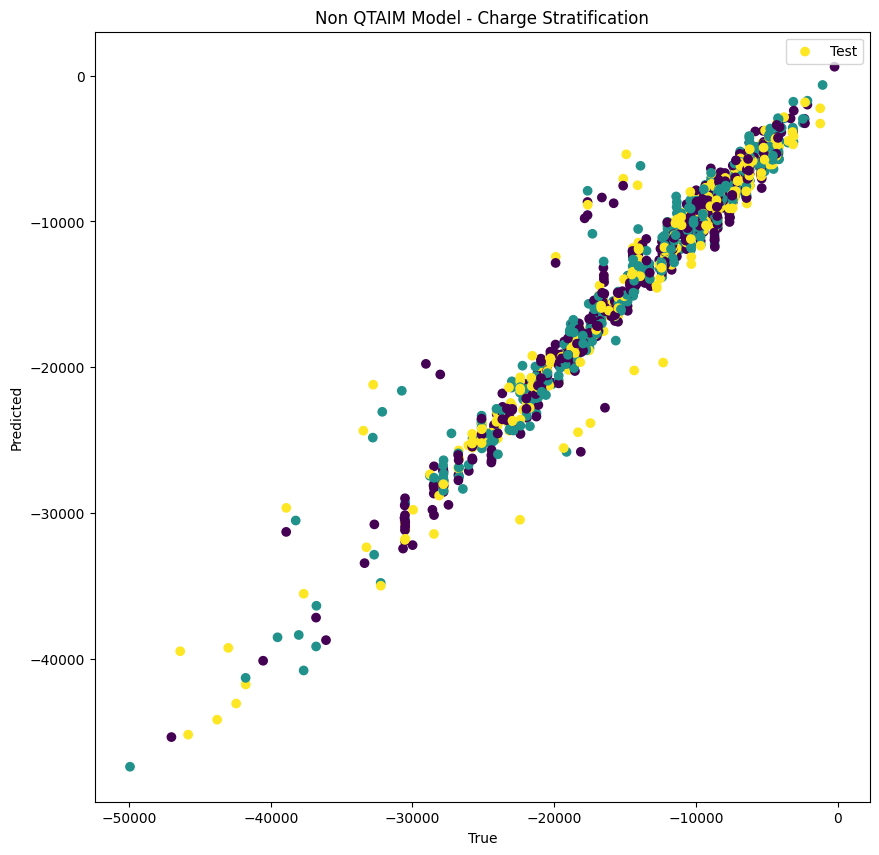

In [19]:
plt.figure(figsize=(10, 10))
plt.title("Non QTAIM Model - Charge Stratification")
# plot scatter but with color by charge
plt.scatter(
    results_dict["no_qtaim"]["test_labels"],
    results_dict["no_qtaim"]["test_preds"],
    c=results_dict["no_qtaim"]["charge_list_test"],
    cmap="viridis",
    label="Test",
)

plt.xlabel("True")
plt.ylabel("Predicted")
plt.legend()
plt.show()


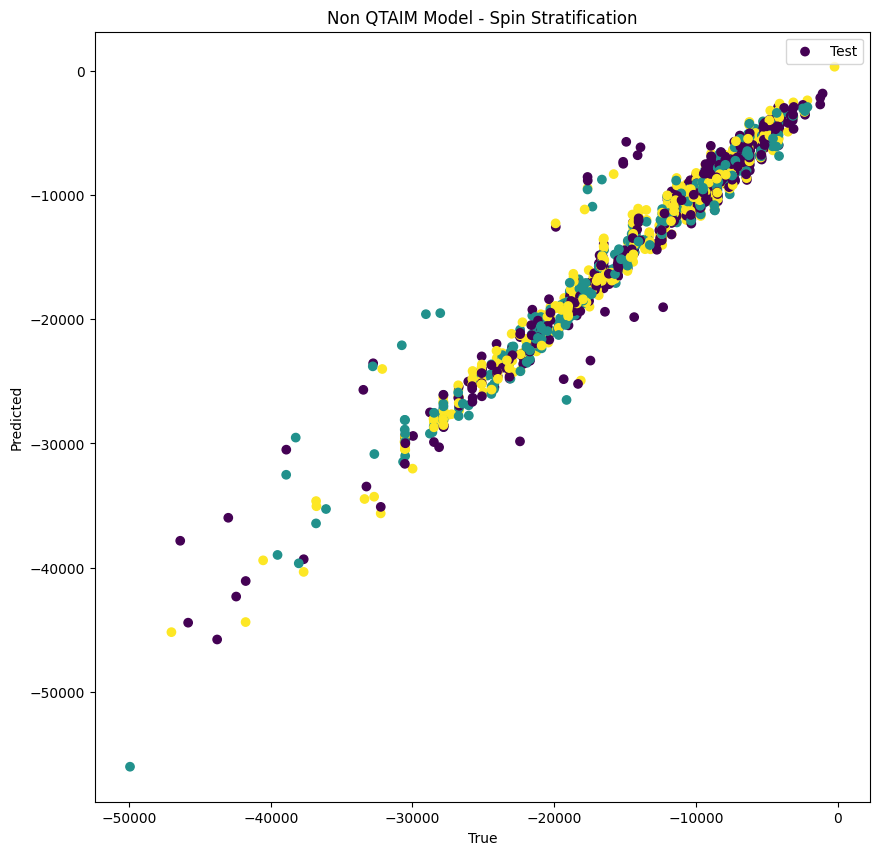

In [12]:
plt.figure(figsize=(10, 10))
plt.title("Non QTAIM Model - Spin Stratification")
# plot scatter but with color by charge
plt.scatter(
    results_dict["no_qtaim"]["test_labels"].detach().numpy(),
    results_dict["no_qtaim"]["test_preds"].detach().numpy(),
    c=results_dict["no_qtaim"]["spin_list_test"],
    cmap="viridis",
    label="Test",
)

plt.xlabel("True")
plt.ylabel("Predicted")
plt.legend()
plt.show()


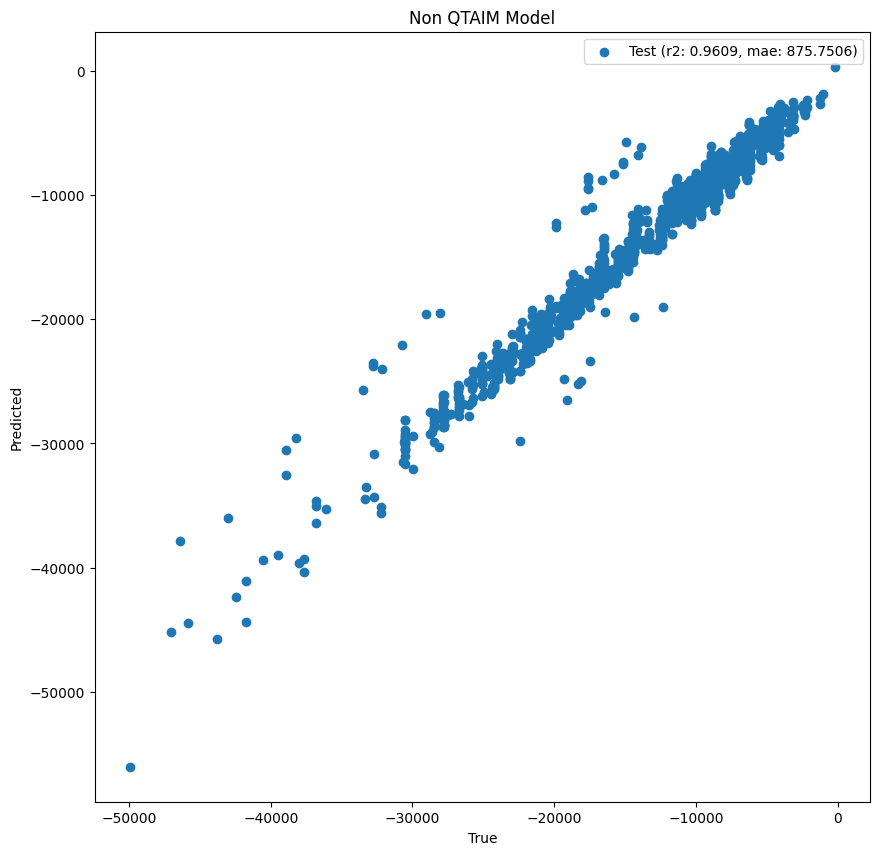

In [13]:
plt.figure(figsize=(10, 10))
plt.title("Non QTAIM Model")
"""plt.scatter(
    results_dict["no_qtaim"]["train_labels"].detach().numpy(), 
    results_dict["no_qtaim"]["train_preds"].detach().numpy(), 
    label="Train (r2: {:.4f}, mae: {:.4f})".format(
        results_dict["no_qtaim"]["statistics_dict"]["train"]["r2"], 
        results_dict["no_qtaim"]["statistics_dict"]["train"]["mae"]
        )
    )"""

plt.scatter(
    results_dict["no_qtaim"]["test_labels"].detach().numpy(),
    results_dict["no_qtaim"]["test_preds"].detach().numpy(),
    label="Test (r2: {:.4f}, mae: {:.4f})".format(
        results_dict["no_qtaim"]["statistics_dict"]["test"]["r2"],
        results_dict["no_qtaim"]["statistics_dict"]["test"]["mae"],
    ),
)


plt.xlabel("True")
plt.ylabel("Predicted")
plt.legend()
plt.show()


In [20]:
from qtaim_embed.models.utils import get_test_train_preds_as_df, test_and_predict_libe


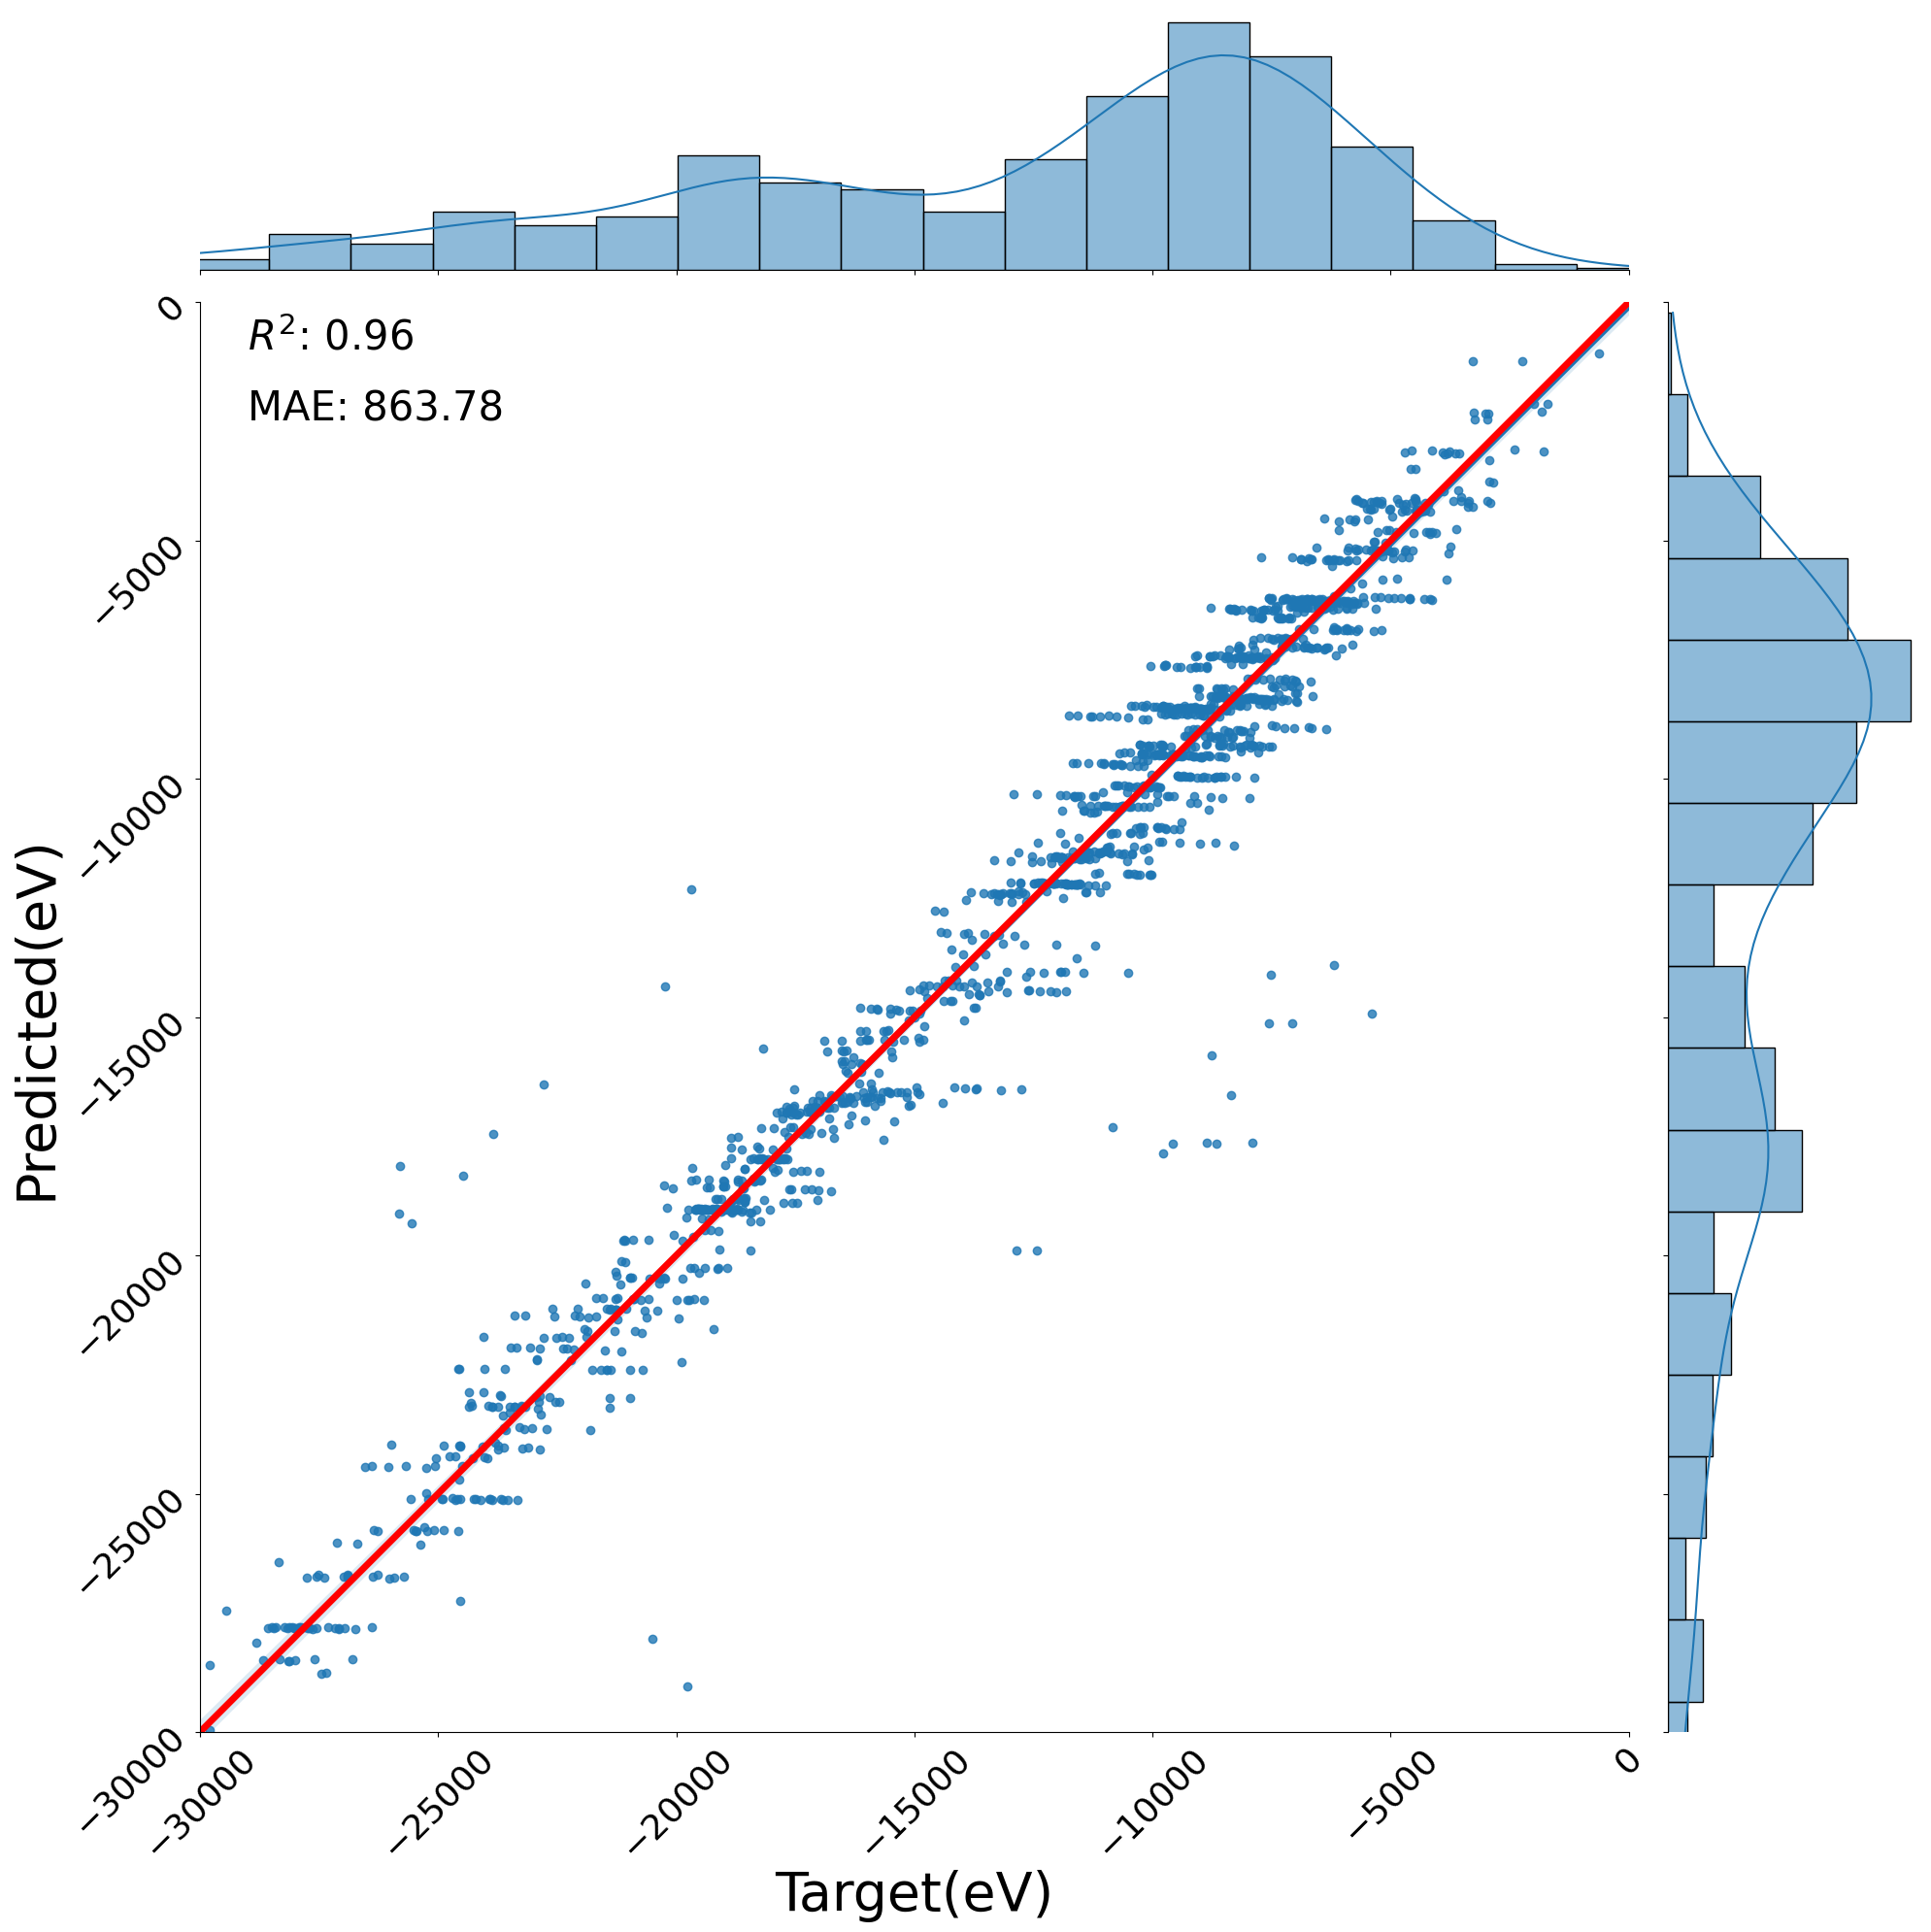

In [29]:
key = "no_qtaim"
df_test, df_train = get_test_train_preds_as_df(results_dict, key)
# specify number of bins
num_bins = 50
# make jointplots
sns.jointplot(
    x="preds",
    y="labels",
    data=df_test,
    kind="reg",
    height=20,
    space=0,
    ylim=(-30000, 0000),
    xlim=(-30000, 0000),
    # joint_kws={"line_kws": {"color": "red"}},
    # joint_kws={"gridsize": 80},
).set_axis_labels("Target(eV)", "Predicted(eV)")
# set font sizes
plt.xlabel("Target(eV)", fontsize=40)
plt.ylabel("Predicted(eV)", fontsize=40)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
# rotate xticks
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
# add diagonal line
plt.plot([-30000, 0000], [-30000, 0000], linewidth=5, color="red")
# add statistics
plt.text(
    -29000,
    -1000,
    "$R^2$: {:.2f}".format(results_dict[key]["statistics_dict"]["test"]["r2"]),
    fontsize=30,
)
plt.text(
    -29000,
    -2500,
    "MAE: {:.2f}".format(results_dict[key]["statistics_dict"]["test"]["mae"]),
    fontsize=30,
)
# add title
plt.show()


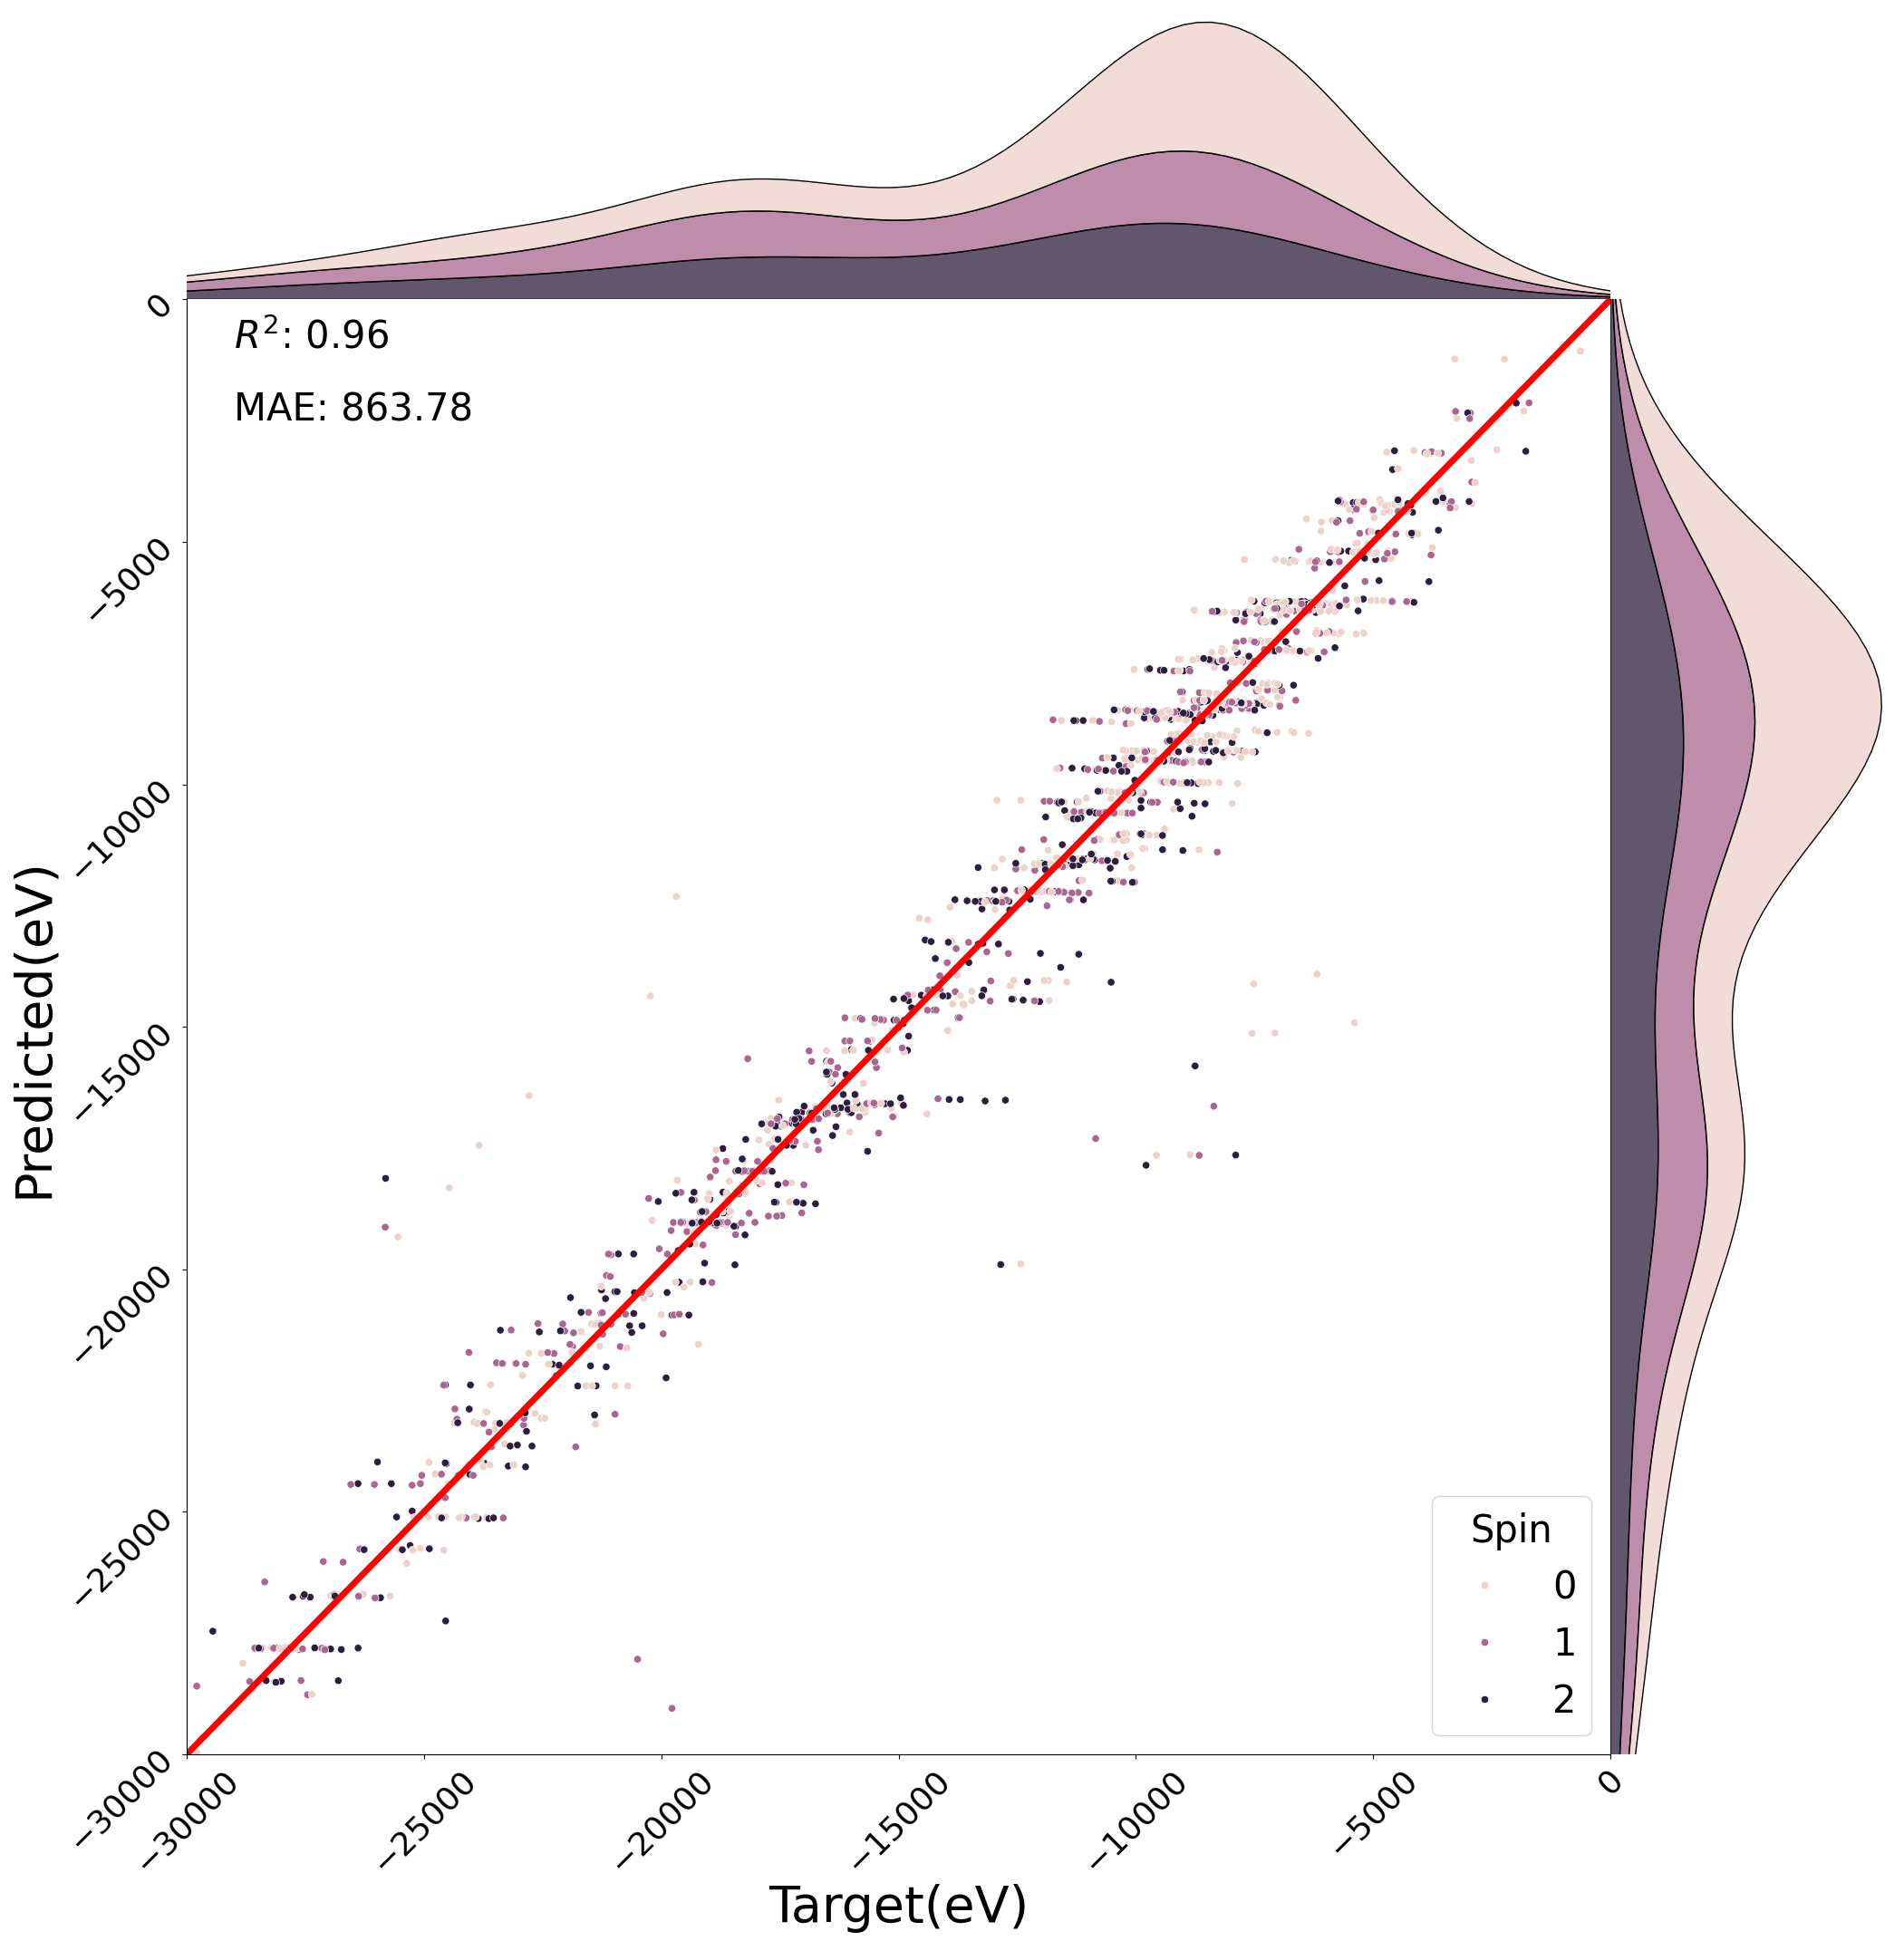

In [30]:
# specify number of bins
num_bins = 50
# make jointplots
g = sns.jointplot(
    x="preds",
    y="labels",
    data=df_test,
    kind="scatter",
    hue="spin",
    height=20,
    space=0,
    marginal_ticks=False,
    ylim=(-30000, 0000),
    xlim=(-30000, 0000),
    marginal_kws=dict(
        fill=True,
        color="white",
        multiple="stack",
    ),
    # joint_kws={"line_kws": {"color": "red"}},
    # joint_kws={"gridsize": 80},
).set_axis_labels("Target(eV)", "Predicted(eV)")
# set font sizes
plt.xlabel("Target(eV)", fontsize=40)
plt.ylabel("Predicted(eV)", fontsize=40)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
# rotate xticks
plt.xticks(rotation=45)
plt.yticks(rotation=45)
# plt.tight_layout()
# add diagonal line
plt.plot([-30000, 0000], [-30000, 0000], linewidth=5, color="red")
# add statistics
plt.text(
    -29000,
    -1000,
    "$R^2$: {:.2f}".format(results_dict[key]["statistics_dict"]["test"]["r2"]),
    fontsize=30,
)
plt.text(
    -29000,
    -2500,
    "MAE: {:.2f}".format(results_dict[key]["statistics_dict"]["test"]["mae"]),
    fontsize=30,
)
# remove marginal axis labels
g.ax_marg_x.set_axis_off()
g.ax_marg_y.set_axis_off()

# remove axis label from kde

# make legend large and move it to bottom right and label it
plt.legend(fontsize=30, loc="lower right", title="Spin", title_fontsize=30)
# add title
plt.show()


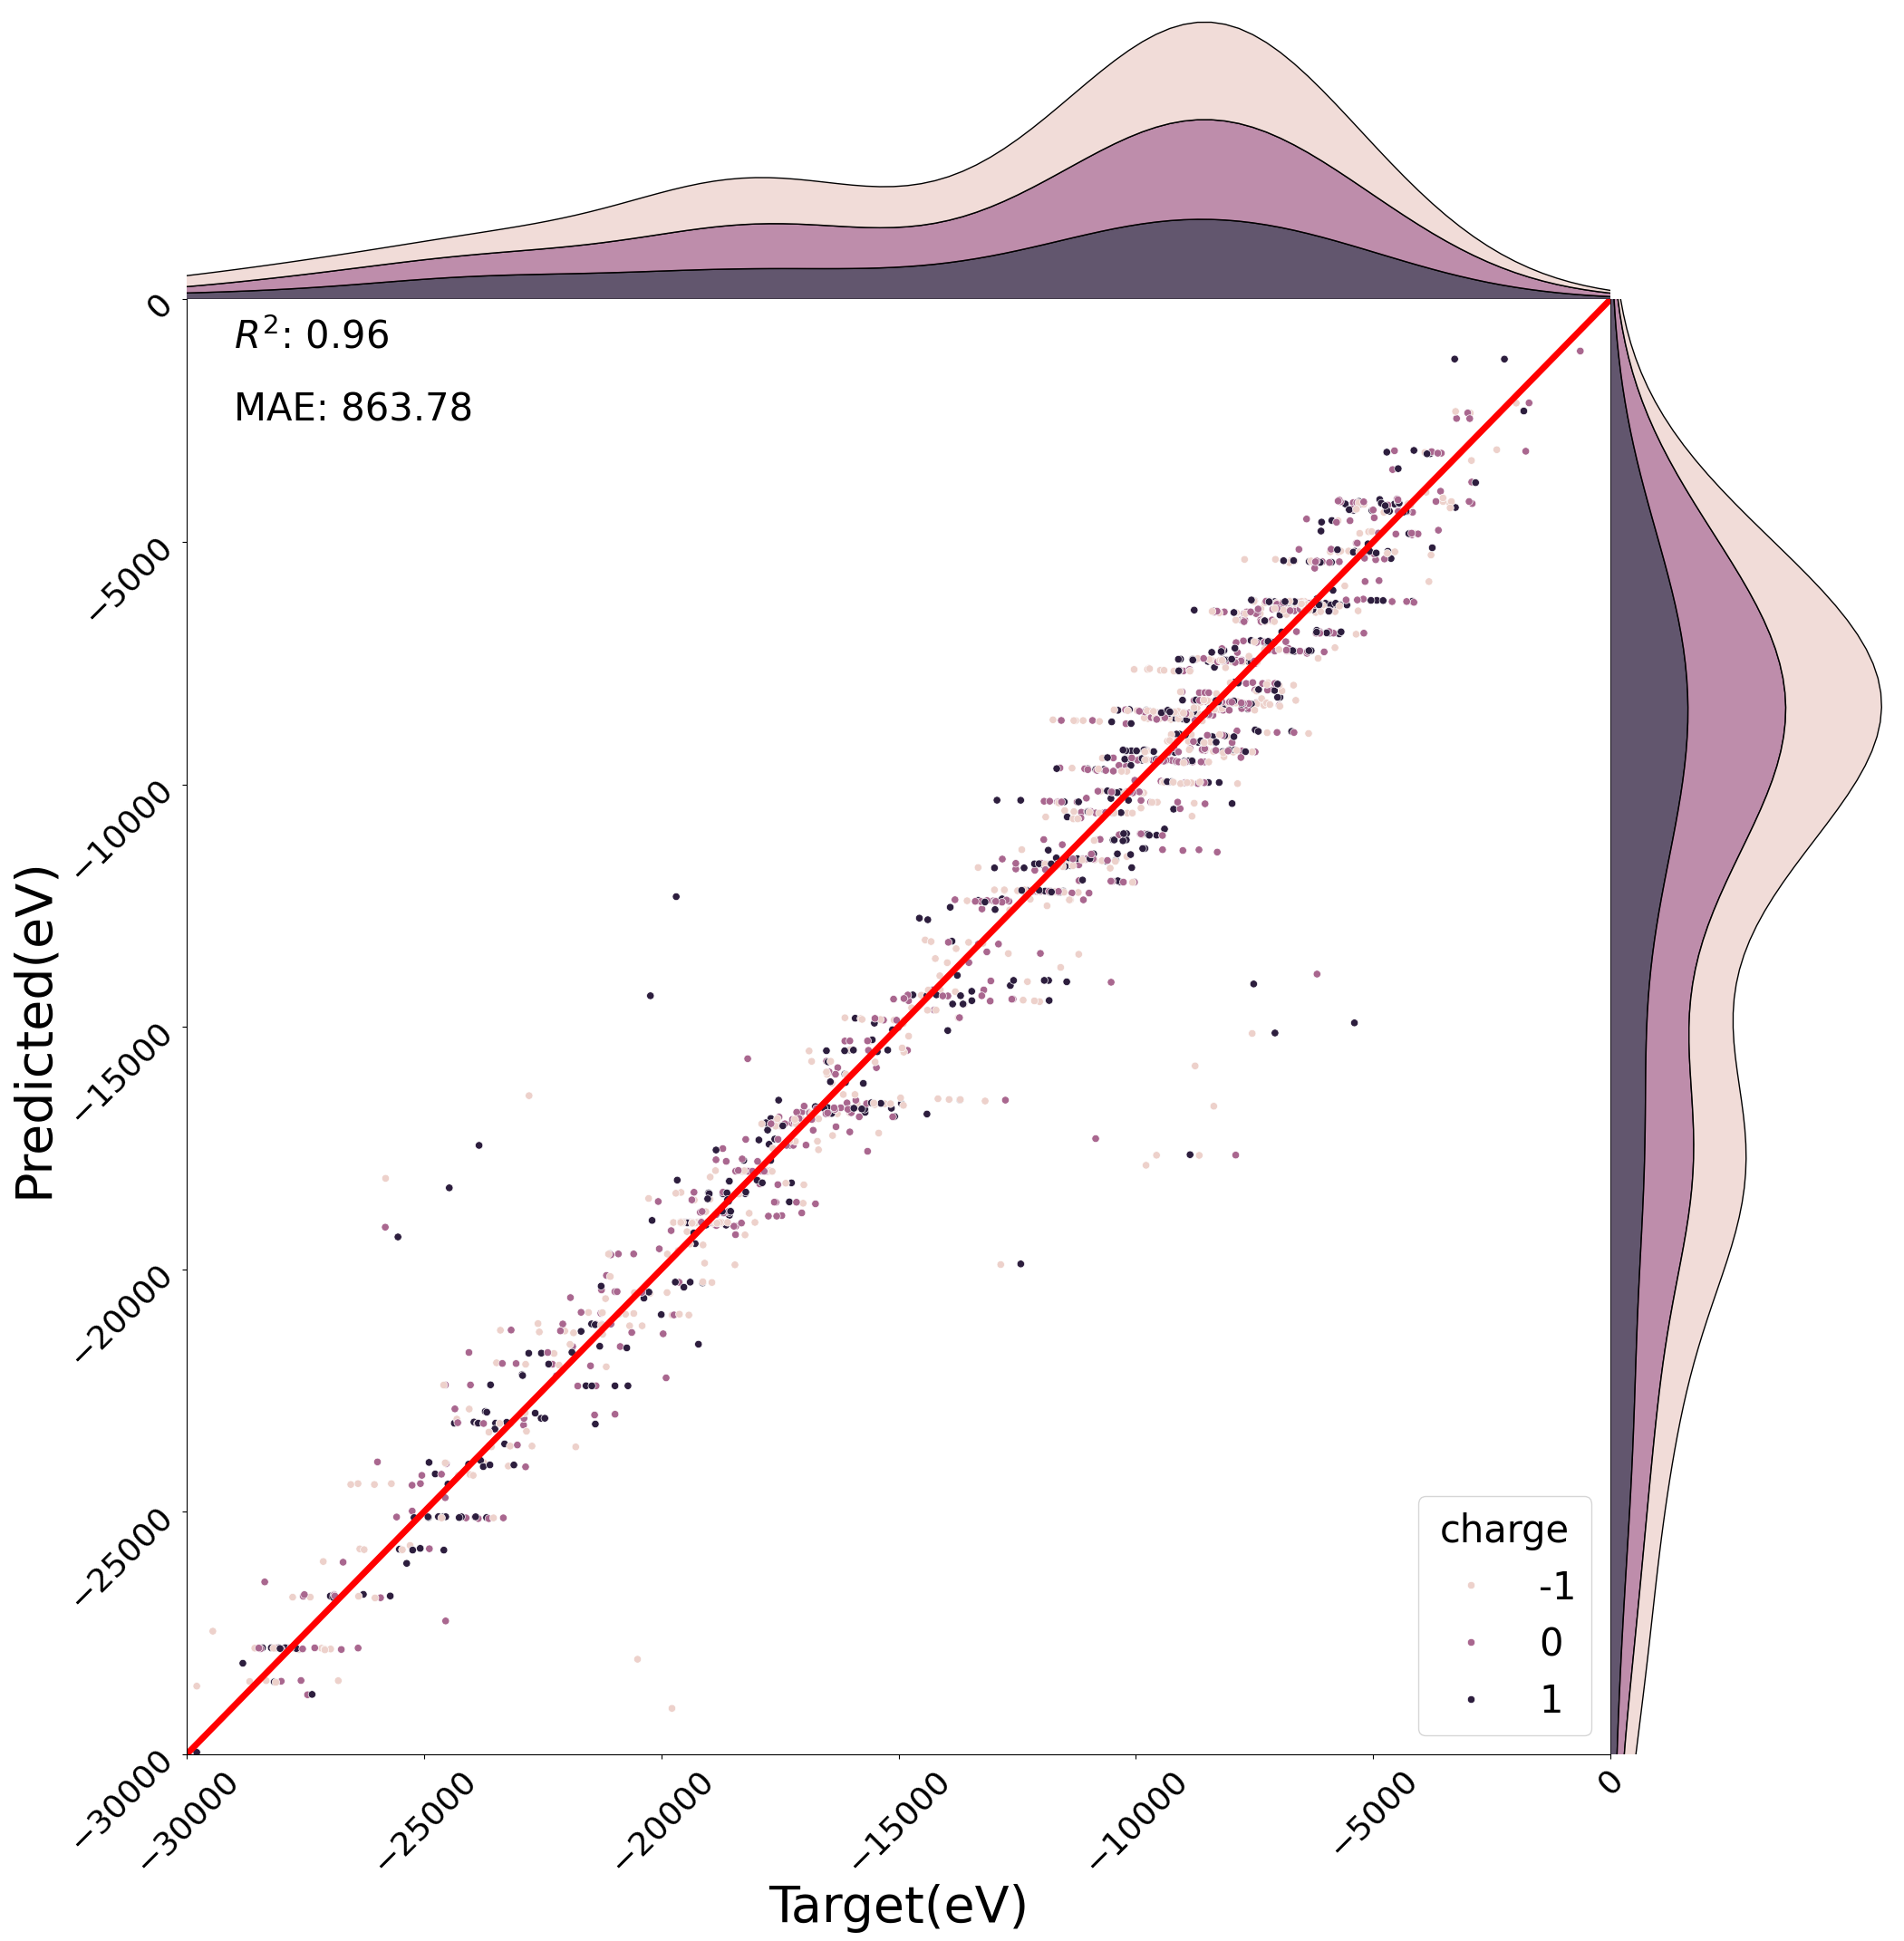

In [31]:
# specify number of bins
num_bins = 50
# make jointplots
g = sns.jointplot(
    x="preds",
    y="labels",
    data=df_test,
    kind="scatter",
    hue="charge",
    height=20,
    space=0,
    marginal_ticks=False,
    ylim=(-30000, 0000),
    xlim=(-30000, 0000),
    marginal_kws=dict(
        fill=True,
        color="white",
        multiple="stack",
    ),
    # joint_kws={"line_kws": {"color": "red"}},
    # joint_kws={"gridsize": 80},
).set_axis_labels("Target(eV)", "Predicted(eV)")
# set font sizes
plt.xlabel("Target(eV)", fontsize=40)
plt.ylabel("Predicted(eV)", fontsize=40)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
# rotate xticks
plt.xticks(rotation=45)
plt.yticks(rotation=45)
# plt.tight_layout()
# add diagonal line
plt.plot([-30000, 0000], [-30000, 0000], linewidth=5, color="red")
# add statistics
plt.text(
    -29000,
    -1000,
    "$R^2$: {:.2f}".format(results_dict[key]["statistics_dict"]["test"]["r2"]),
    fontsize=30,
)
plt.text(
    -29000,
    -2500,
    "MAE: {:.2f}".format(results_dict[key]["statistics_dict"]["test"]["mae"]),
    fontsize=30,
)
# remove marginal axis labels
g.ax_marg_x.set_axis_off()
g.ax_marg_y.set_axis_off()

# remove axis label from kde

# make legend large and move it to bottom right and label it
plt.legend(fontsize=30, loc="lower right", title="charge", title_fontsize=30)
# add title
plt.show()

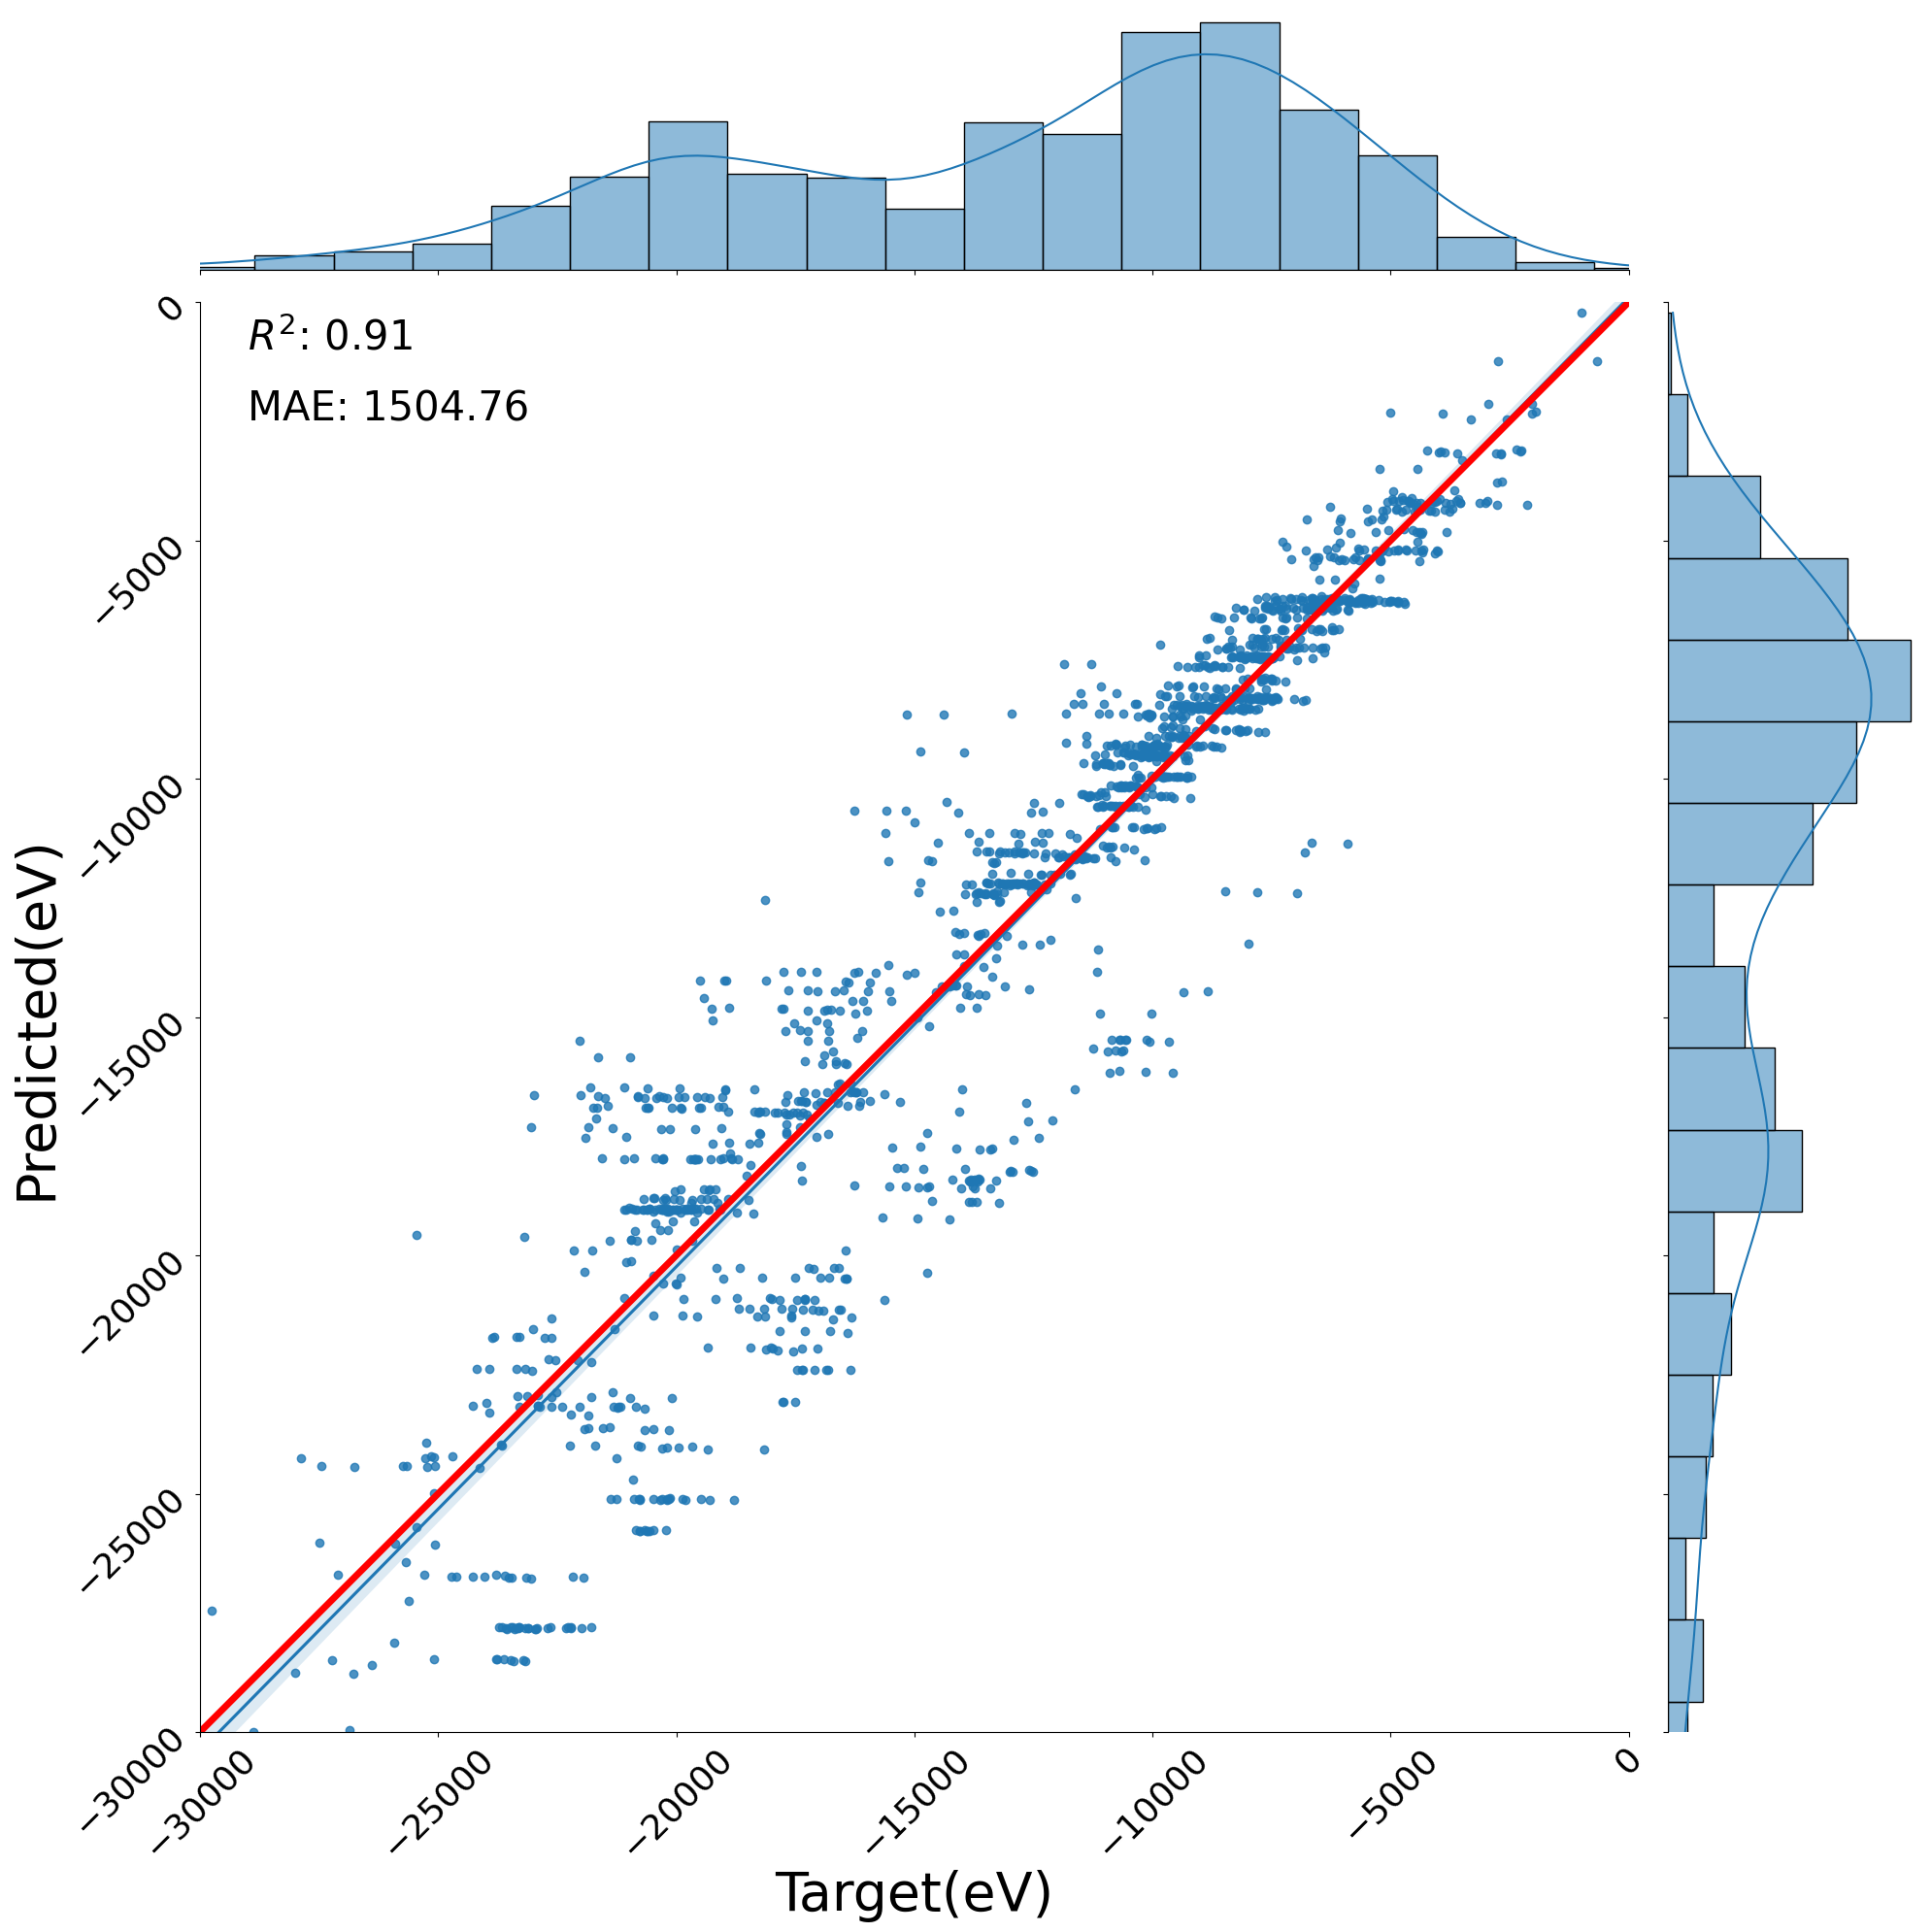

In [22]:
key = "qtaim"
df_test, df_train = get_test_train_preds_as_df(results_dict, key)
# specify number of bins
num_bins = 50
# make jointplots
sns.jointplot(
    x="preds",
    y="labels",
    data=df_test,
    kind="reg",
    height=20,
    space=0,
    ylim=(-30000, 0000),
    xlim=(-30000, 0000),
    # joint_kws={"line_kws": {"color": "red"}},
    # joint_kws={"gridsize": 80},
).set_axis_labels("Target(eV)", "Predicted(eV)")
# set font sizes
plt.xlabel("Target(eV)", fontsize=40)
plt.ylabel("Predicted(eV)", fontsize=40)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
# rotate xticks
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
# add diagonal line
plt.plot([-30000, 0000], [-30000, 0000], linewidth=5, color="red")
# add statistics
plt.text(
    -29000,
    -1000,
    "$R^2$: {:.2f}".format(results_dict[key]["statistics_dict"]["test"]["r2"]),
    fontsize=30,
)
plt.text(
    -29000,
    -2500,
    "MAE: {:.2f}".format(results_dict[key]["statistics_dict"]["test"]["mae"]),
    fontsize=30,
)
# add title
plt.show()


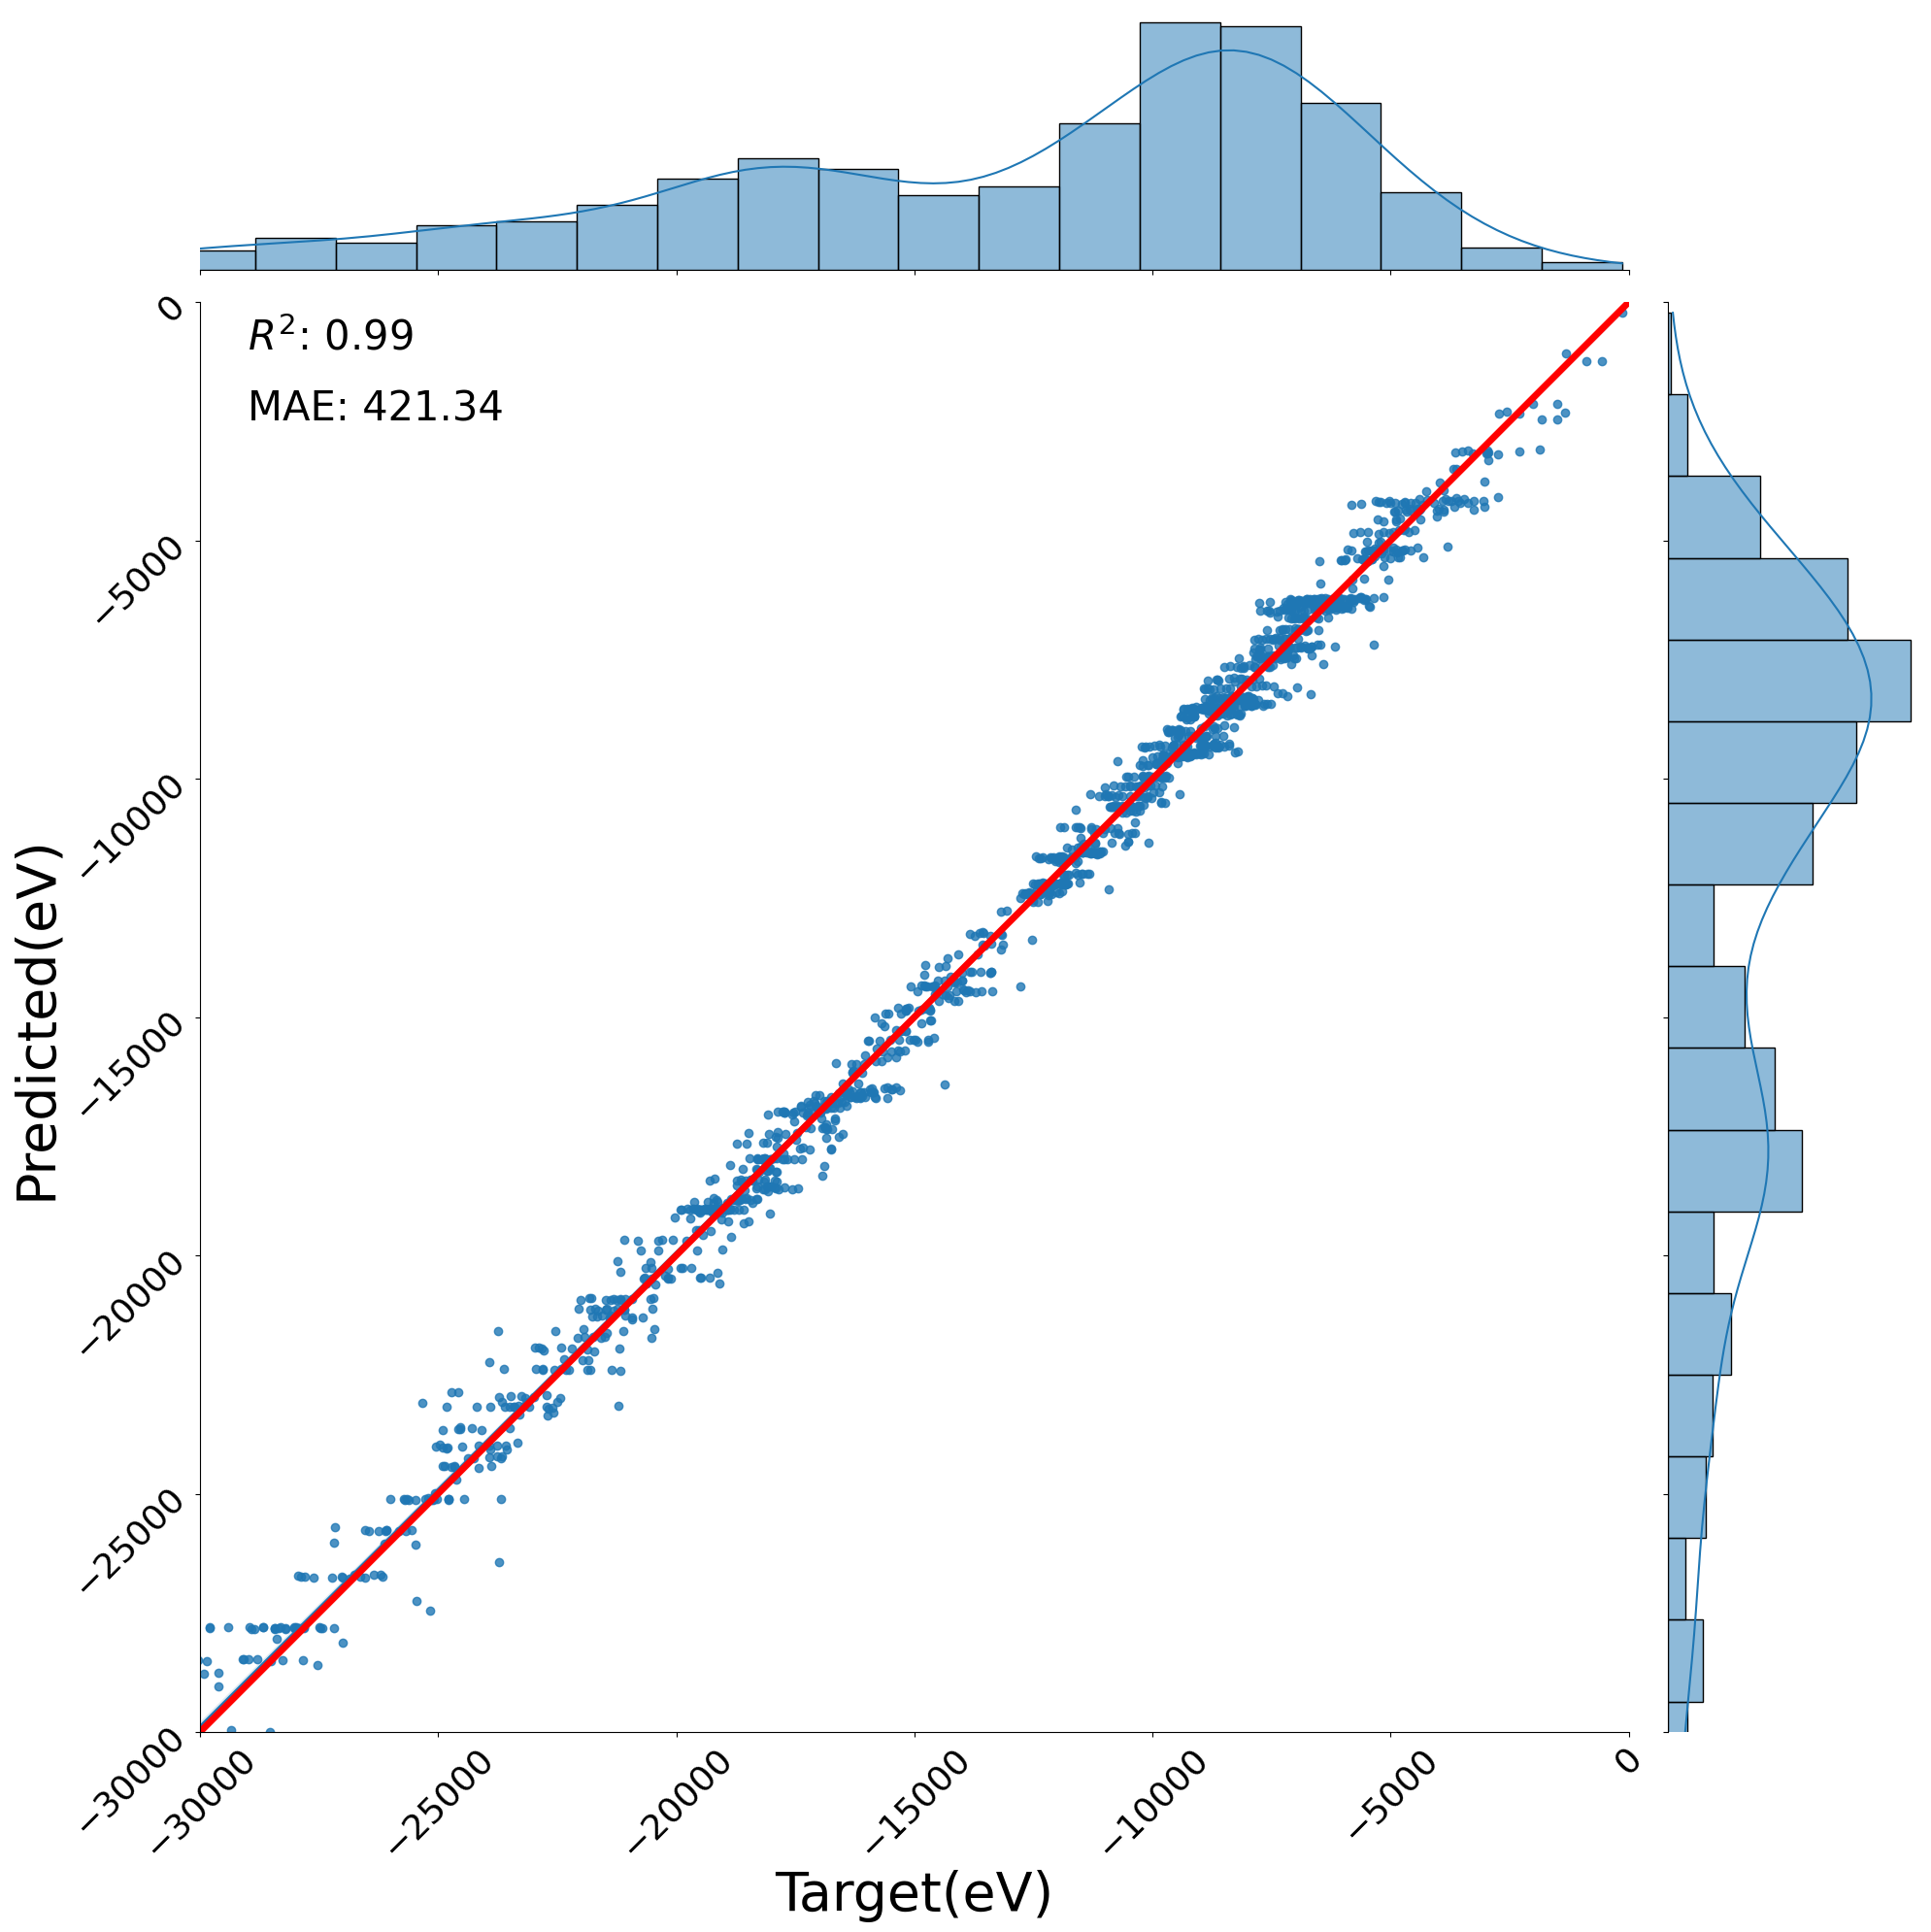

In [32]:
key = "qtaim_full"
df_test, df_train = get_test_train_preds_as_df(results_dict, key)
# specify number of bins
num_bins = 50
# make jointplots
sns.jointplot(
    x="preds",
    y="labels",
    data=df_test,
    kind="reg",
    height=20,
    space=0,
    ylim=(-30000, 0000),
    xlim=(-30000, 0000),
    # joint_kws={"line_kws": {"color": "red"}},
    # joint_kws={"gridsize": 80},
).set_axis_labels("Target(eV)", "Predicted(eV)")
# set font sizes
plt.xlabel("Target(eV)", fontsize=40)
plt.ylabel("Predicted(eV)", fontsize=40)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
# rotate xticks
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
# add diagonal line
plt.plot([-30000, 0000], [-30000, 0000], linewidth=5, color="red")
# add statistics
plt.text(
    -29000,
    -1000,
    "$R^2$: {:.2f}".format(results_dict[key]["statistics_dict"]["test"]["r2"]),
    fontsize=30,
)
plt.text(
    -29000,
    -2500,
    "MAE: {:.2f}".format(results_dict[key]["statistics_dict"]["test"]["mae"]),
    fontsize=30,
)
# add title
plt.show()


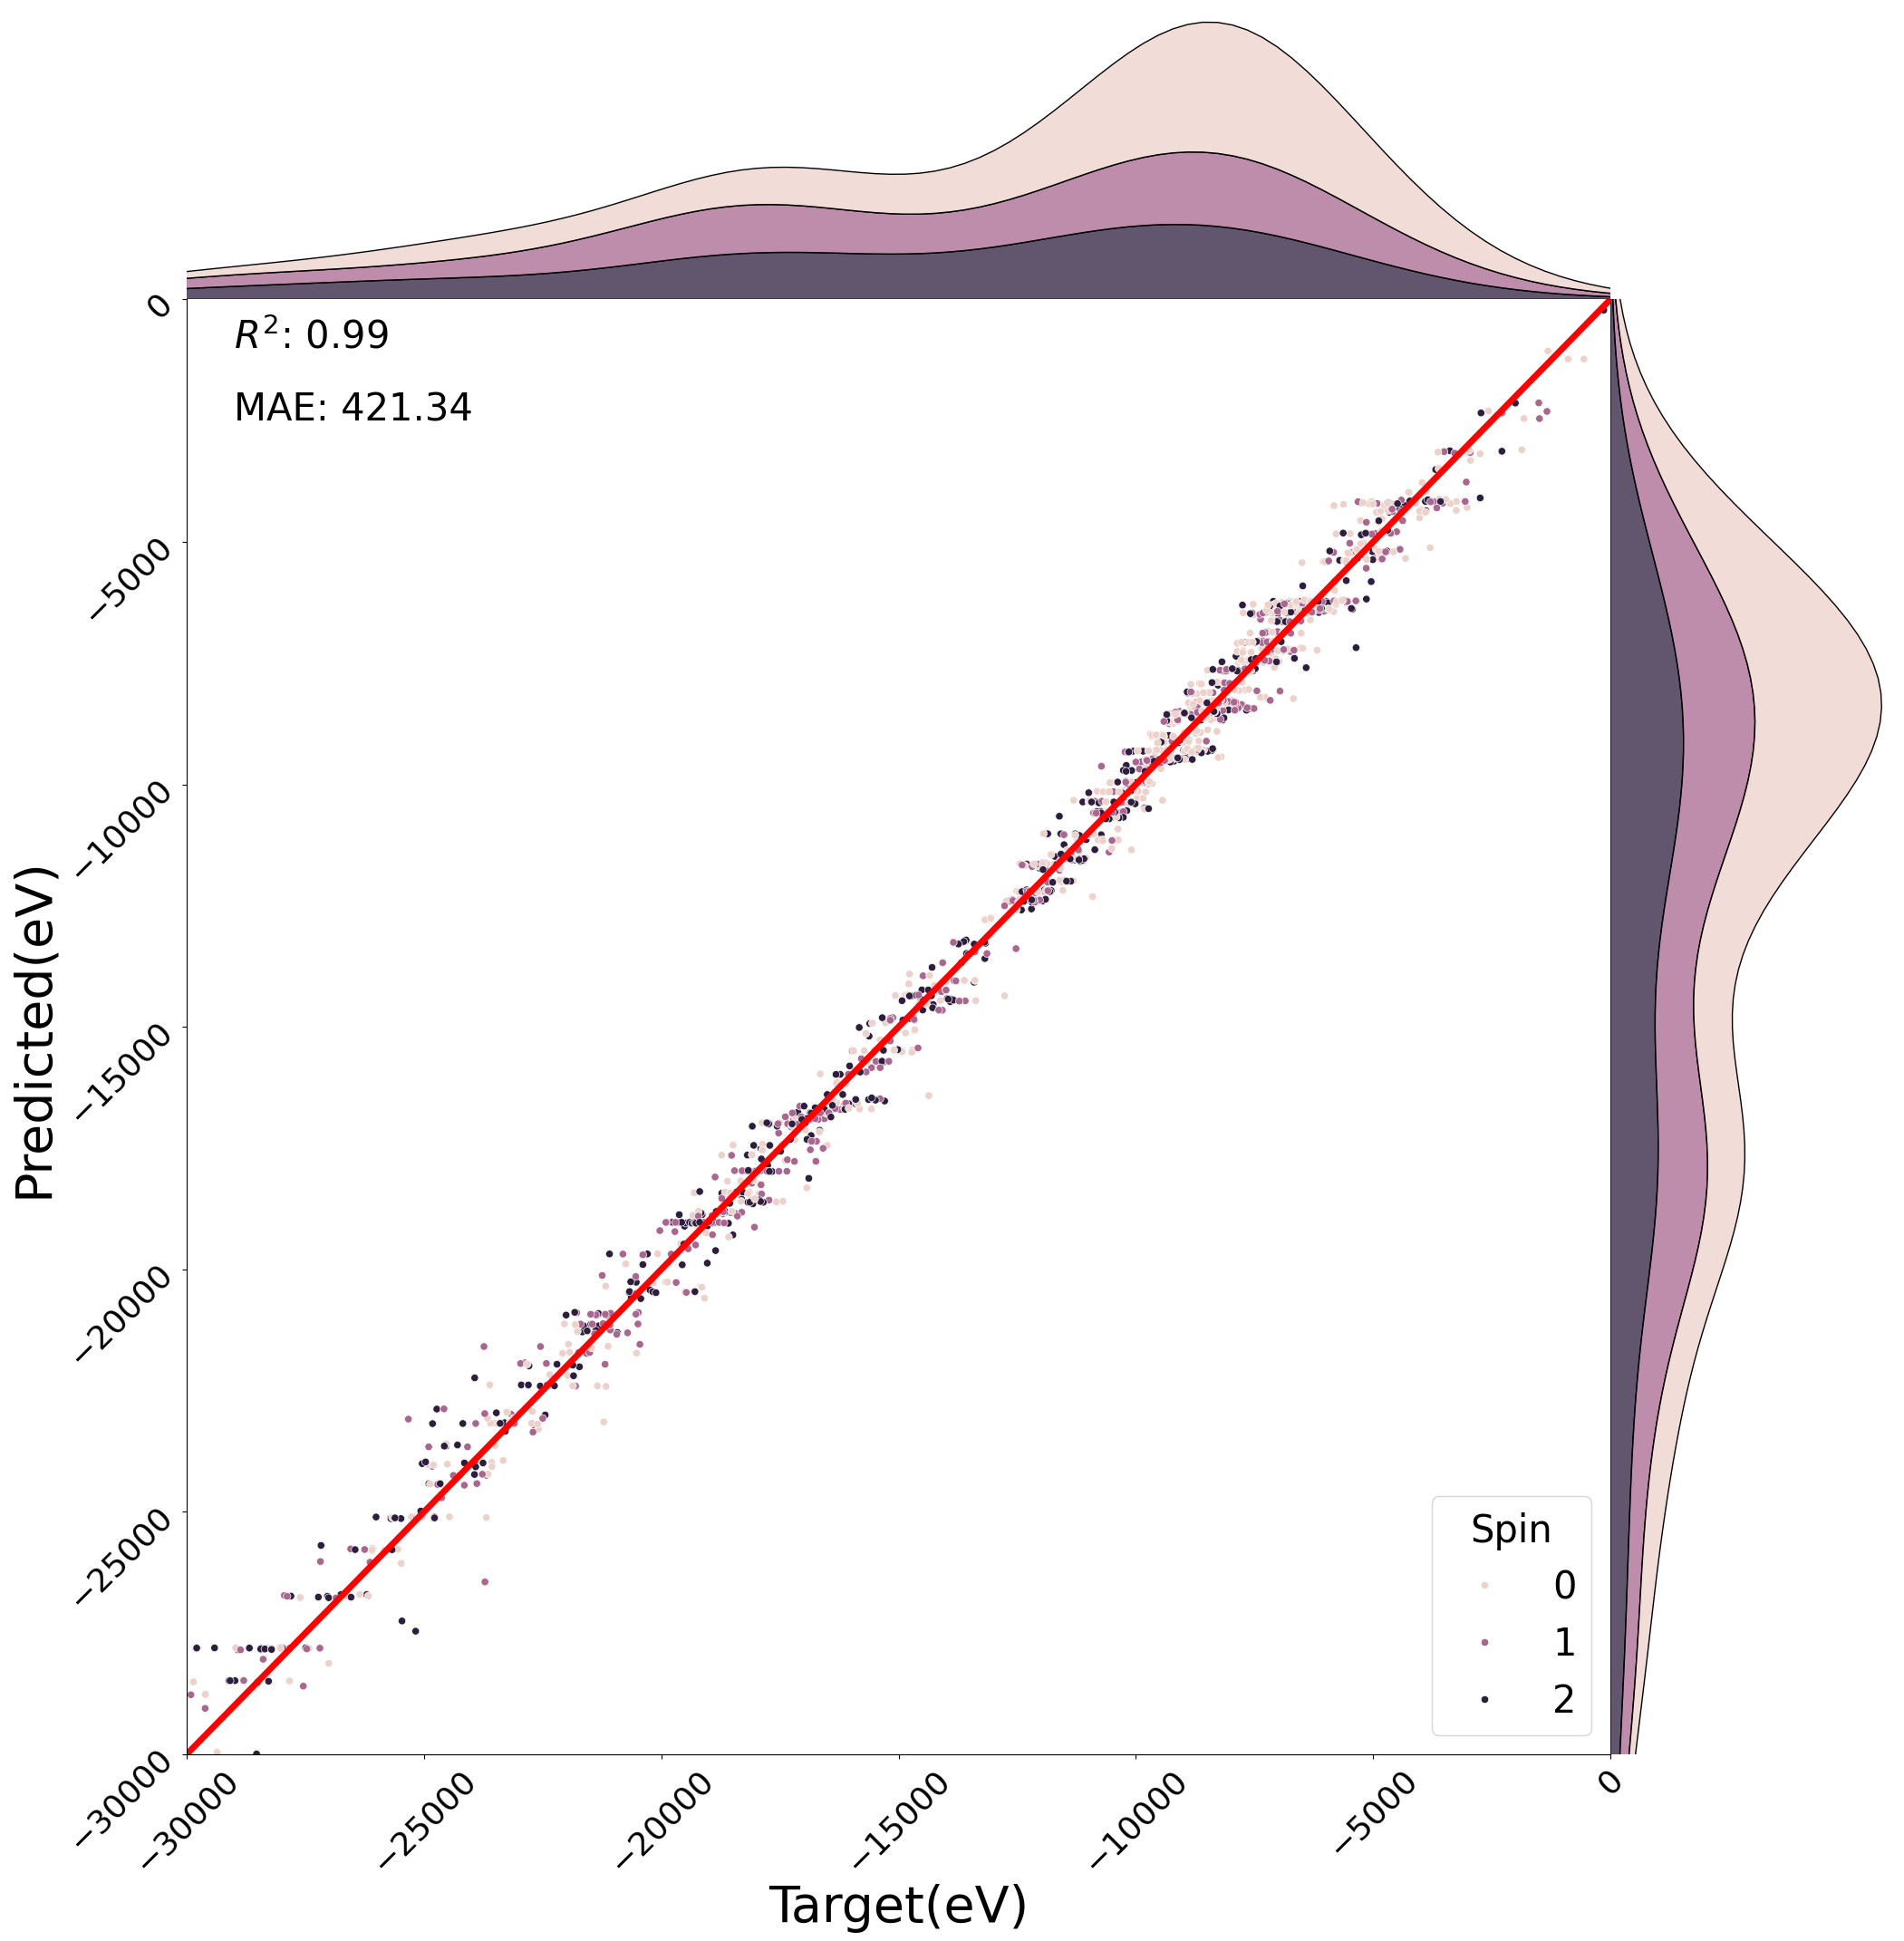

In [33]:
# specify number of bins
num_bins = 50
# make jointplots
g = sns.jointplot(
    x="preds",
    y="labels",
    data=df_test,
    kind="scatter",
    hue="spin",
    height=20,
    space=0,
    marginal_ticks=False,
    ylim=(-30000, 0000),
    xlim=(-30000, 0000),
    marginal_kws=dict(
        fill=True,
        color="white",
        multiple="stack",
    ),
    # joint_kws={"line_kws": {"color": "red"}},
    # joint_kws={"gridsize": 80},
).set_axis_labels("Target(eV)", "Predicted(eV)")
# set font sizes
plt.xlabel("Target(eV)", fontsize=40)
plt.ylabel("Predicted(eV)", fontsize=40)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
# rotate xticks
plt.xticks(rotation=45)
plt.yticks(rotation=45)
# plt.tight_layout()
# add diagonal line
plt.plot([-30000, 0000], [-30000, 0000], linewidth=5, color="red")
# add statistics
plt.text(
    -29000,
    -1000,
    "$R^2$: {:.2f}".format(results_dict[key]["statistics_dict"]["test"]["r2"]),
    fontsize=30,
)
plt.text(
    -29000,
    -2500,
    "MAE: {:.2f}".format(results_dict[key]["statistics_dict"]["test"]["mae"]),
    fontsize=30,
)
# remove marginal axis labels
g.ax_marg_x.set_axis_off()
g.ax_marg_y.set_axis_off()

# remove axis label from kde

# make legend large and move it to bottom right and label it
plt.legend(fontsize=30, loc="lower right", title="Spin", title_fontsize=30)
# add title
plt.show()

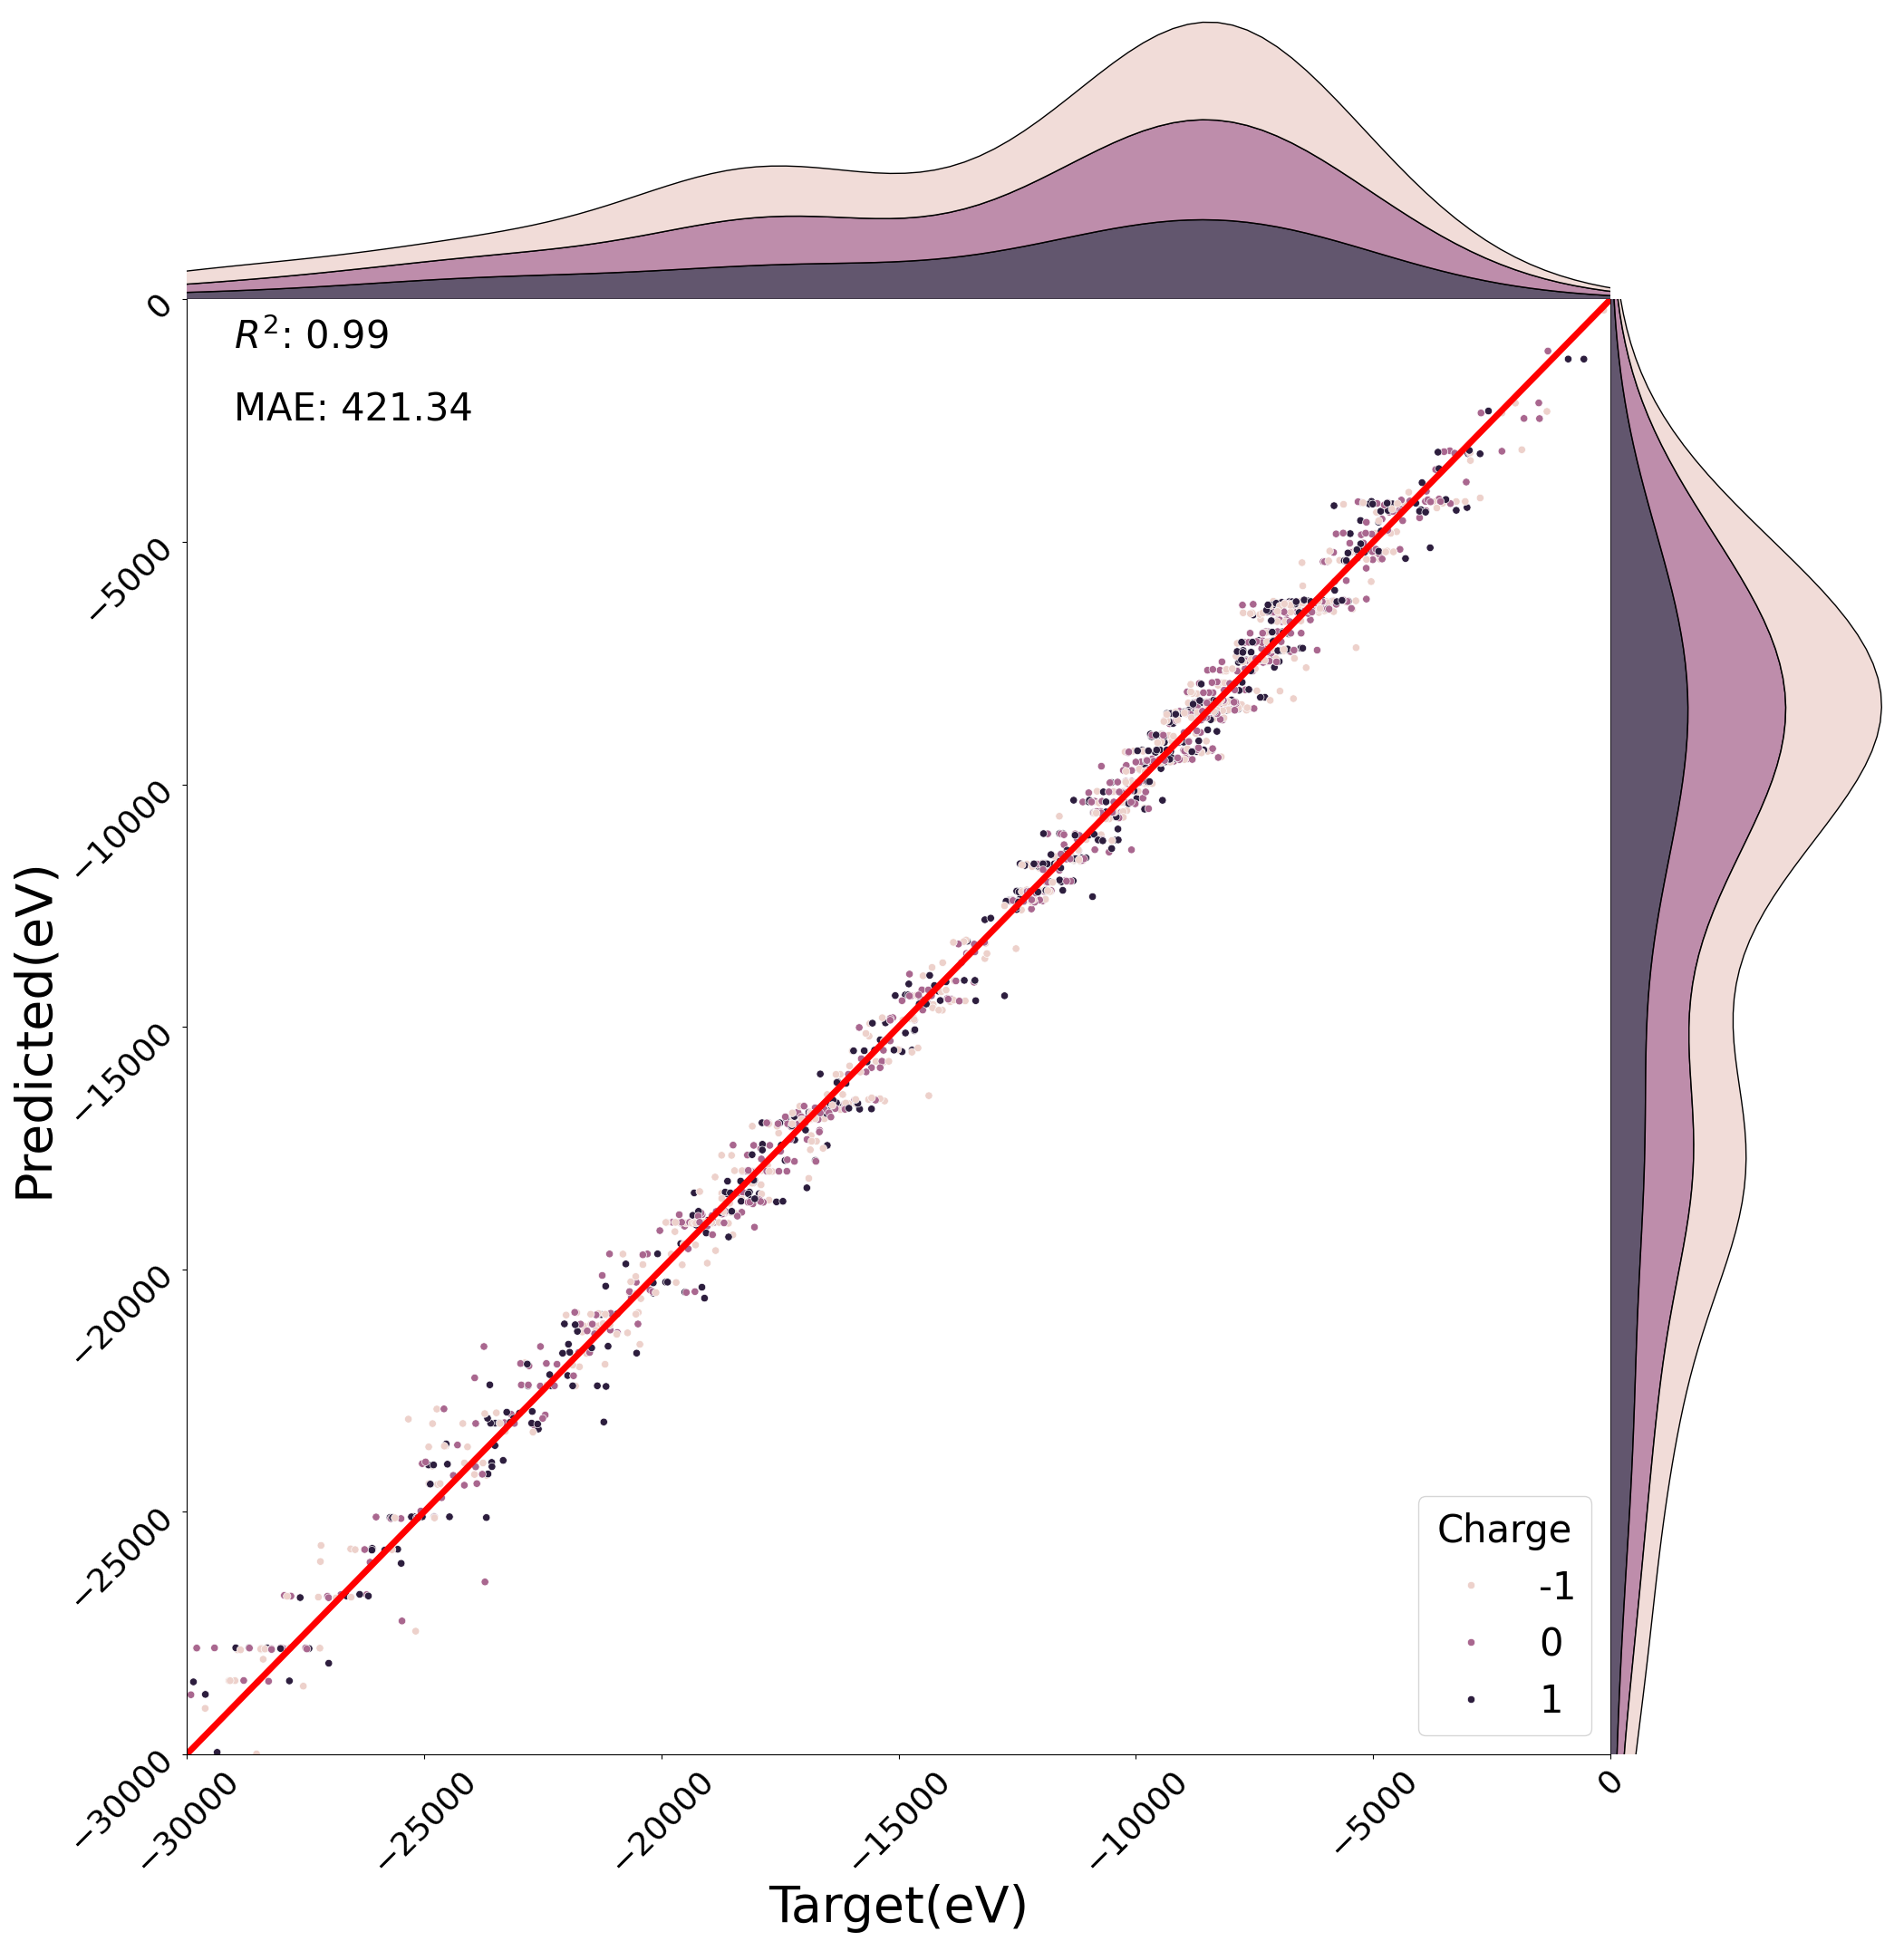

In [34]:
# specify number of bins
num_bins = 50
# make jointplots
g = sns.jointplot(
    x="preds",
    y="labels",
    data=df_test,
    kind="scatter",
    hue="charge",
    height=20,
    space=0,
    marginal_ticks=False,
    ylim=(-30000, 0000),
    xlim=(-30000, 0000),
    marginal_kws=dict(
        fill=True,
        color="white",
        multiple="stack",
    ),
    # joint_kws={"line_kws": {"color": "red"}},
    # joint_kws={"gridsize": 80},
).set_axis_labels("Target(eV)", "Predicted(eV)")
# set font sizes
plt.xlabel("Target(eV)", fontsize=40)
plt.ylabel("Predicted(eV)", fontsize=40)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
# rotate xticks
plt.xticks(rotation=45)
plt.yticks(rotation=45)
# plt.tight_layout()
# add diagonal line
plt.plot([-30000, 0000], [-30000, 0000], linewidth=5, color="red")
# add statistics
plt.text(
    -29000,
    -1000,
    "$R^2$: {:.2f}".format(results_dict[key]["statistics_dict"]["test"]["r2"]),
    fontsize=30,
)
plt.text(
    -29000,
    -2500,
    "MAE: {:.2f}".format(results_dict[key]["statistics_dict"]["test"]["mae"]),
    fontsize=30,
)
# remove marginal axis labels
g.ax_marg_x.set_axis_off()
g.ax_marg_y.set_axis_off()

# remove axis label from kde

# make legend large and move it to bottom right and label it
plt.legend(fontsize=30, loc="lower right", title="Charge", title_fontsize=30)
# add title
plt.show()

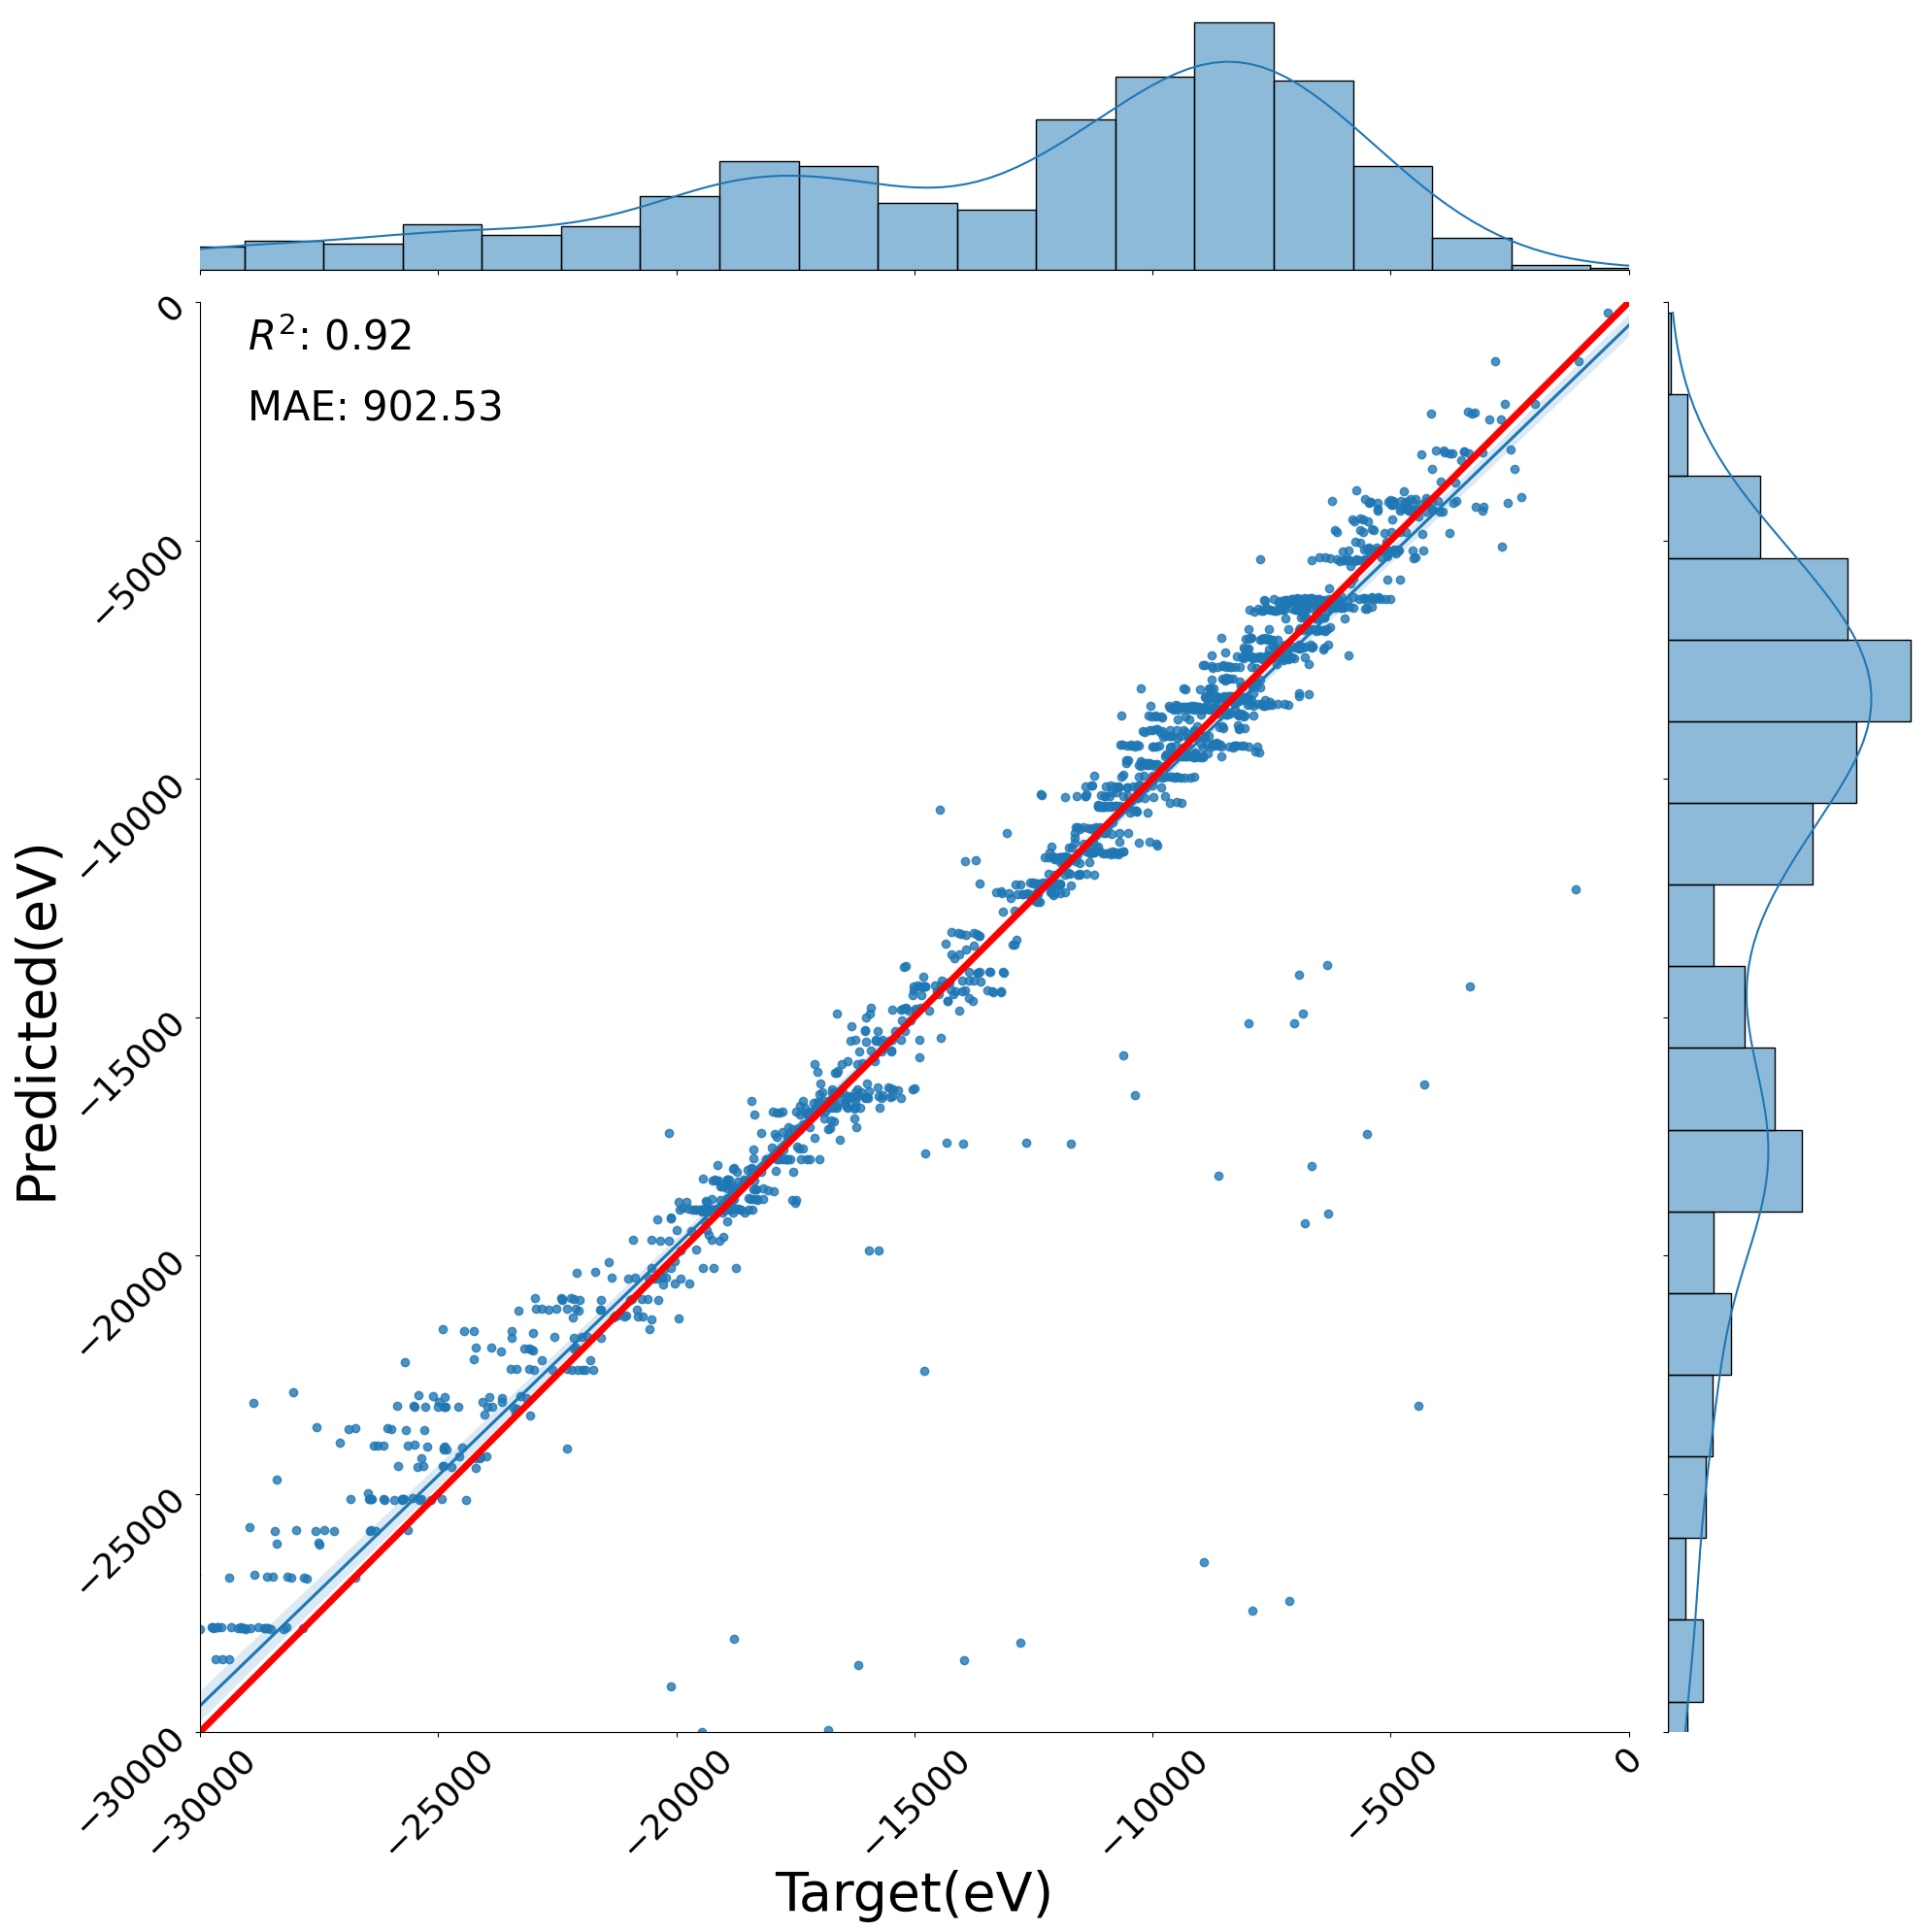

In [24]:
key = "qtaim_mid"
df_test, df_train = get_test_train_preds_as_df(results_dict, key)
# specify number of bins
num_bins = 50
# make jointplots
sns.jointplot(
    x="preds",
    y="labels",
    data=df_test,
    kind="reg",
    height=20,
    space=0,
    ylim=(-30000, 0000),
    xlim=(-30000, 0000),
    # joint_kws={"line_kws": {"color": "red"}},
    # joint_kws={"gridsize": 80},
).set_axis_labels("Target(eV)", "Predicted(eV)")
# set font sizes
plt.xlabel("Target(eV)", fontsize=40)
plt.ylabel("Predicted(eV)", fontsize=40)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
# rotate xticks
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
# add diagonal line
plt.plot([-30000, 0000], [-30000, 0000], linewidth=5, color="red")
# add statistics
plt.text(
    -29000,
    -1000,
    "$R^2$: {:.2f}".format(results_dict[key]["statistics_dict"]["test"]["r2"]),
    fontsize=30,
)
plt.text(
    -29000,
    -2500,
    "MAE: {:.2f}".format(results_dict[key]["statistics_dict"]["test"]["mae"]),
    fontsize=30,
)
# add title
plt.show()


In [25]:
dict(results_dict["qtaim_full"]["model"].hparams)


{'atom_input_size': 37,
 'bond_input_size': 29,
 'global_input_size': 9,
 'conv_fn': 'GraphConvDropoutBatch',
 'target_dict': {'global': ['shifted_rrho_ev_free_energy']},
 'dropout': 0.2,
 'batch_norm_tf': False,
 'activation': 'ReLU',
 'bias': True,
 'norm': 'both',
 'aggregate': 'sum',
 'n_conv_layers': 6,
 'lr': 0.04070805821895211,
 'weight_decay': 1e-05,
 'lr_plateau_patience': 25,
 'lr_scale_factor': 0.5,
 'scheduler_name': 'reduce_on_plateau',
 'loss_fn': 'mse',
 'resid_n_graph_convs': 3,
 'embedding_size': 100,
 'fc_layer_size': [1024, 1024, 1024],
 'fc_dropout': 0.1,
 'fc_batch_norm': True,
 'n_fc_layers': 3,
 'global_pooling': 'SumPoolingThenCat',
 'ntypes_pool': ['atom', 'bond', 'global'],
 'ntypes_pool_direct_cat': ['global'],
 'lstm_iters': 15,
 'lstm_layers': 2,
 'num_heads': 2,
 'feat_drop': 0.1,
 'attn_drop': 0.1,
 'residual': True,
 'hidden_size': 50,
 'ntasks': 1,
 'num_heads_gat': 2,
 'dropout_feat_gat': 0.1,
 'dropout_attn_gat': 0.1,
 'hidden_size_gat': 50,
 'residu

In [26]:
dict(results_dict["no_qtaim"]["model"].hparams)


{'atom_input_size': 16,
 'bond_input_size': 7,
 'global_input_size': 9,
 'conv_fn': 'ResidualBlock',
 'target_dict': {'global': ['shifted_rrho_ev_free_energy']},
 'dropout': 0.2,
 'batch_norm_tf': True,
 'activation': 'ReLU',
 'bias': True,
 'norm': 'both',
 'aggregate': 'sum',
 'n_conv_layers': 5,
 'lr': 0.01885852849843154,
 'weight_decay': 1e-05,
 'lr_plateau_patience': 25,
 'lr_scale_factor': 0.5,
 'scheduler_name': 'reduce_on_plateau',
 'loss_fn': 'mse',
 'resid_n_graph_convs': 2,
 'embedding_size': 50,
 'fc_layer_size': [1024, 512, 256],
 'fc_dropout': 0.1,
 'fc_batch_norm': True,
 'n_fc_layers': 3,
 'global_pooling': 'SumPoolingThenCat',
 'ntypes_pool': ['atom', 'bond', 'global'],
 'ntypes_pool_direct_cat': ['global'],
 'lstm_iters': 9,
 'lstm_layers': 2,
 'num_heads': 3,
 'feat_drop': 0.1,
 'attn_drop': 0.1,
 'residual': False,
 'hidden_size': 10,
 'ntasks': 1,
 'num_heads_gat': 3,
 'dropout_feat_gat': 0.1,
 'dropout_attn_gat': 0.1,
 'hidden_size_gat': 10,
 'residual_gat': Fals